<a href="https://colab.research.google.com/github/sreeramulu/PPAOC/blob/main/2nd_Attempt_Telcome_Customer_Churn_Survey_with_ML_Ops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

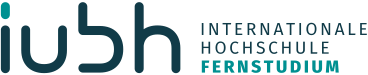

PPAOC Pipeline | Topics:
--- | ---
| <center> features, label, churn,model, classification,Regression NLP, <br> Tuning, Hyperparameter, XGBoost, Log. regression </center>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive




# Intro
As our task involves classification, it is crucial to acquire a labeled dataset. The dataset employed for this classification challenge is derived from a telecom dataset, publicly accessible and originally obtained from the IBM sample dataset. You can find the dataset link [here](click here). Furthermore, we have validated the model using internal data from Comcast XM Mobile, incorporating sources such as the Data Lake, Technician app, campaign feedback, endorsements, and insights from third-party consultancies like survey monkey.

The process of establishing the use case pipeline commences with importing essential libraries that will be indispensable throughout the case. For data manipulation and processing, Pandas and Numpy are employed, while Matplotlib and Seaborn are utilized for visualization.

It is noteworthy that several studies indicate that machine learning practitioners allocate a significant portion, ranging from 60% to 80%, of their time to data preparation. This example underscores the unique nature of each dataset, making data preparation a problem-solving endeavor. <br>

# The Data and Structure

The initial step before contemplating suitable algorithms for the task is to comprehend the data and transform it into an input matrix $X$ and a vector of labels $y$, **all numbers**.

# Loading of the Data

It always helps to start looking at the first few lines:

In [2]:
# File path for Customer Churn dataset
customer_churn_file_path = '/content/gdrive/My Drive/Colab Notebooks/AIAcademy_old/Data/Customer-Churn.csv'

# Print the first few lines in this file
with open(customer_churn_file_path) as file:
    for i in range(5):
        print(file.readline())


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn

7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No

5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No

3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes

7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No



(Reminder: Our task is to convert the above to a matrix of numbers $X$ and a vector of numbers $y$ so that we can apply some machine algorithm to the problem).

* the file format is CSV.
* The size of the file is 18MB so it should fit in memory without problem.

Let's use Pandas to read the whole csv file in memory.


In [3]:
# File path for Customer Churn dataset
customer_churn_file_path = '/content/gdrive/My Drive/Colab Notebooks/AIAcademy_old/Data/Customer-Churn.csv'

# Use Pandas' read_csv method to read the whole file in memory
# Name the returned data frame "data1"
import pandas as pd

cc_data = pd.read_csv(customer_churn_file_path, encoding='latin')
cc_data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA Exporatory Data Analysis

Ok, we were able to load the csv in memory. <br>
Pandas provide the `describe()` method that gives a quick overview of the whole file:

In [4]:
cc_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Key points:
* There are 7043 rows
* There are total of 21 columns: 3 numerical, 16 categorical, 1 id and 1 target column
* 'Total Charges' provides a numerical values, but the numbers are stored as on object
Some categorical features are stored as a string
* Churn is the target variable


Have a look at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.startswith.html


In [6]:
# Display data types for "tenure" and "Total Charges" columns
for column in ["tenure", "TotalCharges"]:
    print(f"{column}'s data type: {cc_data[column].dtype}")

tenure's data type: int64
TotalCharges's data type: object


In [7]:
# a quick overview of the data
cc_data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
cc_data['SeniorCitizen'].tail(10)

7033    0
7034    0
7035    0
7036    0
7037    0
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, dtype: int64

In [9]:
cc_data['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [10]:
# Display unique values count and values for each column
for column in cc_data.columns:
    print(f"Unique {column}'s count: {cc_data[column].nunique()}")
    #print(cc_data[column].unique())

Unique customerID's count: 7043
Unique gender's count: 2
Unique SeniorCitizen's count: 2
Unique Partner's count: 2
Unique Dependents's count: 2
Unique tenure's count: 73
Unique PhoneService's count: 2
Unique MultipleLines's count: 3
Unique InternetService's count: 3
Unique OnlineSecurity's count: 3
Unique OnlineBackup's count: 3
Unique DeviceProtection's count: 3
Unique TechSupport's count: 3
Unique StreamingTV's count: 3
Unique StreamingMovies's count: 3
Unique Contract's count: 3
Unique PaperlessBilling's count: 2
Unique PaymentMethod's count: 4
Unique MonthlyCharges's count: 1585
Unique TotalCharges's count: 6531
Unique Churn's count: 2


# Data Preprocessing for EDA

In [11]:
# Ensure data types are
cc_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Convert the datatypes

In [12]:
# Display data types for "tenure" and "Total Charges" columns
for column in ["tenure", "TotalCharges"]:
    print(f"{column}'s data type: {cc_data[column].dtype}")

tenure's data type: int64
TotalCharges's data type: object


In [13]:
import pandas as pd
# Lets convert the datatype of features "TotalCharges" and "tenure" to float
cc_data['TotalCharges'] = pd.to_numeric(cc_data['TotalCharges'], errors='coerce')
cc_data['tenure'] = cc_data['tenure'].astype(float)
cc_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [14]:
cc_data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67.0,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19.0,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7036,7750-EYXWZ,Female,0,No,No,12.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No
7037,2569-WGERO,Female,0,No,No,72.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [15]:
# Rename feature values of "PaymentMethod" for better readability
payment_method = {'Electronic check': 'E-Check', 'Mailed check': 'Mailed check', 'Bank transfer (automatic)': 'Bank transfer', 'Credit card (automatic)': 'Credit card'}
cc_data["PaymentMethod"].replace(payment_method, inplace=True)
cc_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
# check for NA or null values
cc_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Checking Sweness of the Data

In [17]:
#cc_data=df_clipped

In [18]:
# Identify missing values
cc_data.isnull().sum(axis=0)
cc_data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card,69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67.0,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card,102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19.0,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer,78.70,1495.10,No
7036,7750-EYXWZ,Female,0,No,No,12.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,E-Check,60.65,743.30,No
7037,2569-WGERO,Female,0,No,No,72.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer,21.15,1419.40,No
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer,105.65,6844.50,No


In [19]:
# Drop the rows with missing values.
cc_data_dropped = cc_data.dropna()
cc_data_dropped

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
# Drop the customerID feature from the dataset
data1 = cc_data_dropped.drop(columns='customerID')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   float64
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [21]:
# Identify missing values
data1.isnull().sum(axis=0)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
cc_data=data1

In [23]:
cc_data.tail(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,Male,0,No,No,38.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card,69.50,2625.25,No
7034,Female,0,No,No,67.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card,102.95,6886.25,Yes
7035,Male,0,No,No,19.0,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer,78.70,1495.10,No
7036,Female,0,No,No,12.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,E-Check,60.65,743.30,No
7037,Female,0,No,No,72.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer,21.15,1419.40,No
7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No
7041,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer,105.65,6844.50,No


*Univariate Analysis*

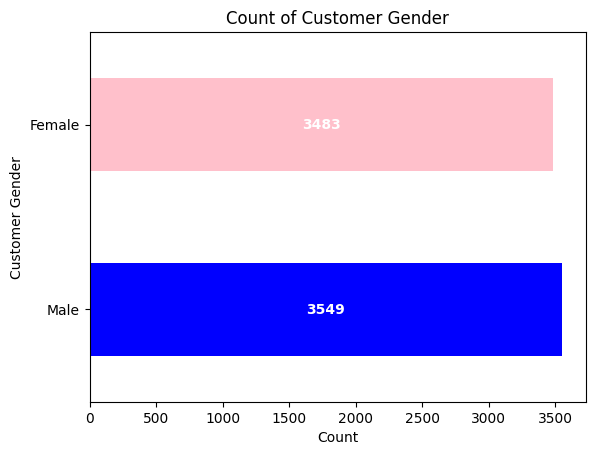

<Figure size 600x400 with 0 Axes>

In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Count occurrences of each gender in the 'customer_gender' column
gender_counts = data1['gender'].value_counts()

# Define colors for the bar chart
bar_colors = ['blue', 'pink']

# Create a horizontal bar chart
ax = gender_counts.plot(kind='barh', color=bar_colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(gender_counts):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Add label, title, and adjust the figure size
plt.title('Count of Customer Gender')
plt.xlabel('Count')
plt.ylabel('Customer Gender')
plt.figure(figsize=(6, 4))

# Display the plot
plt.show()

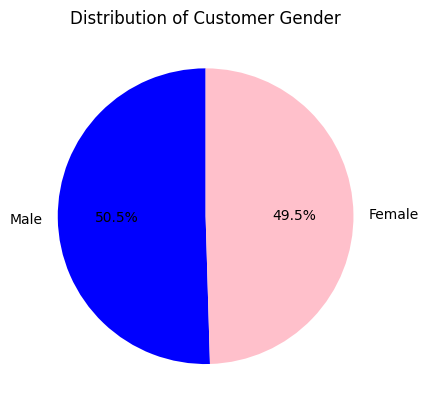

<Figure size 600x600 with 0 Axes>

In [25]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Count occurrences of each gender in the 'customer_gender' column
gender_counts = data1['gender'].value_counts()

# Define colors for the pie chart
pie_colors = ['blue', 'pink']  # Customize colors as needed

# Create a pie chart with percentages
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=pie_colors, startangle=90)

# Add title and adjust the figure size
plt.title('Distribution of Customer Gender')
plt.figure(figsize=(6, 6))

# Display the plot
plt.show()


In [26]:
print(data1['SeniorCitizen'].unique())

[0 1]


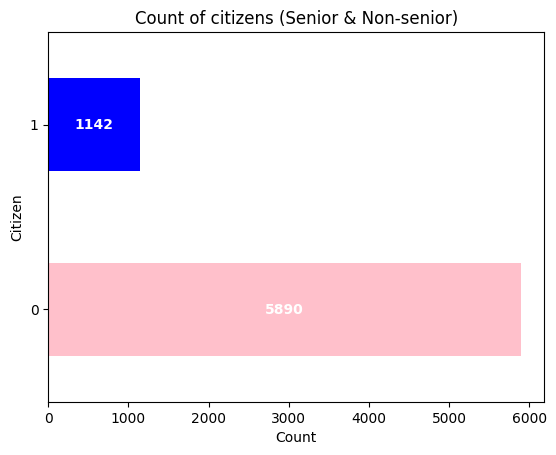

<Figure size 600x400 with 0 Axes>

In [27]:
# This code will plot a horizontal bar chart showing the count of senior and non-senior citizens
citizen_count_data1 = data1['SeniorCitizen'].value_counts()

# list of colors to be used in the bar chart.
colors = ['pink', 'blue']  # Updated colors

# This line creates the horizontal bar chart using the plot() function of the citizen_count_data1 object
ax = citizen_count_data1.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(citizen_count_data1):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title, and size
plt.title('Count of citizens (Senior & Non-senior)')
plt.xlabel('Count')
plt.ylabel('Citizen')
plt.figure(figsize=(6, 4))

plt.show()


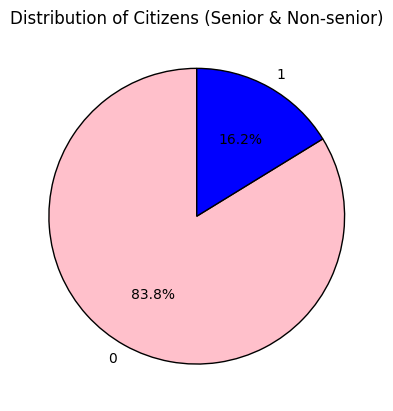

<Figure size 600x600 with 0 Axes>

In [28]:
# Count occurrences of senior and non-senior citizens in the 'SeniorCitizen' column
citizen_count_data1 = data1['SeniorCitizen'].value_counts()

# Define colors for the pie chart
pie_colors = ['pink', 'blue']  # Updated colors

# Create a pie chart with percentages and a border
plt.pie(citizen_count_data1, labels=citizen_count_data1.index, autopct='%1.1f%%', colors=pie_colors, startangle=90,
        wedgeprops=dict(edgecolor='black'))

# Add title and adjust the figure size
plt.title('Distribution of Citizens (Senior & Non-senior)')
plt.figure(figsize=(6, 6))

# Display the plot
plt.show()

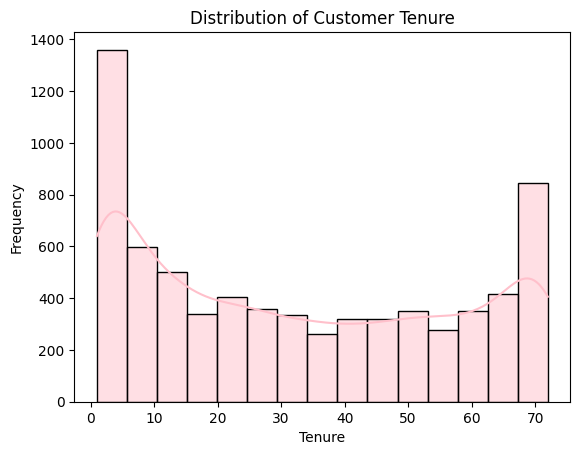

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# creates a histogram plot using the Seaborn library in Python.
sns.histplot(data1['tenure'], kde=True, color='pink')

# Add labels and title
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Tenure')

# Show the plot
plt.show()

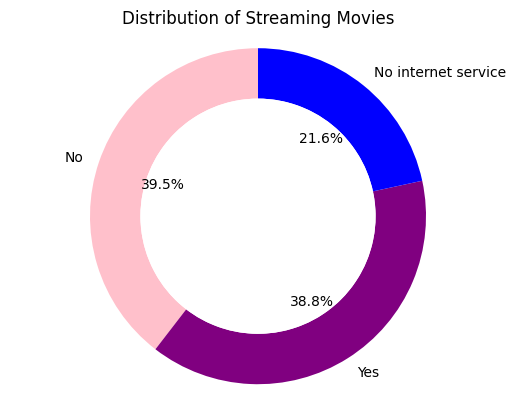

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Get count of different values in the 'StreamingMovies' column
S_movie_count = data1['StreamingMovies'].value_counts()

# Define colors for the pie chart
colors = ['pink', 'purple', 'blue']

# Create a pie chart with percentages
plt.pie(S_movie_count, labels=S_movie_count.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=dict(width=0.3))

# Draw a white circle in the center to create a donut appearance
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adding title
plt.title('Distribution of Streaming Movies')

# Display the plot
plt.show()

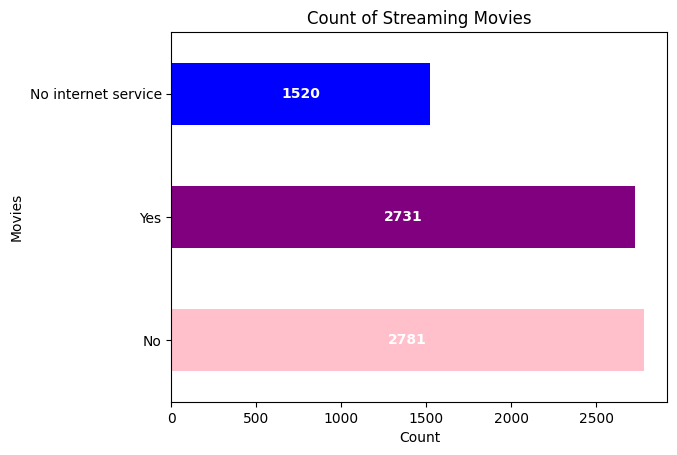

<Figure size 600x400 with 0 Axes>

In [31]:
# First, we obtain a count of the different values in the 'StreamingMovies'
# column of your Pandas DataFrame named 'data1'
S_movie_count = data1['StreamingMovies'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['pink', 'purple', 'blue']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 'barh' for horizontal bars,
# and the color parameter set to the list of colors we defined earlier
ax = S_movie_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(S_movie_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title, and size
plt.title('Count of Streaming Movies')
plt.xlabel('Count')
plt.ylabel('Movies')
plt.figure(figsize=(6, 4))

plt.show()


In [32]:
import plotly.graph_objects as go

# Calculate the value counts for the 'Churn' label
label_counts = data1['Churn'].value_counts()

# Create a bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(x=label_counts.index, y=label_counts.values, marker_color='lightblue')
])

# Add annotations (count values) on top of the bars
for i, count in enumerate(label_counts.values):
    fig.add_annotation(
        x=label_counts.index[i],
        y=count + 50,  # Adjust the vertical position for better visibility
        text=str(count),
        showarrow=False,
        font=dict(size=12, color='black'),
        opacity=0.8
    )

# Customize layout
fig.update_layout(
    title='Churn Label Counts',
    xaxis_title='Churn',
    yaxis_title='Count',
    width=500,
    height=600,
    showlegend=False
)

# Show the plot
fig.show()


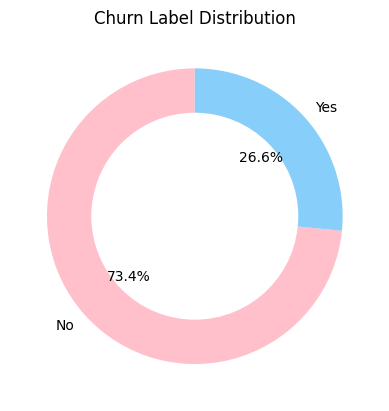

<Figure size 600x600 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

# Calculate the value counts for the 'Churn' label
label_counts = data1['Churn'].value_counts()

# Define colors for the circles
colors = ['pink', 'lightskyblue']

# Create a pie chart with percentages
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

# Add a white circle in the center to create a donut-like appearance
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title and adjust the figure size
plt.title('Churn Label Distribution')
plt.figure(figsize=(6, 6))

# Display the plot
plt.show()


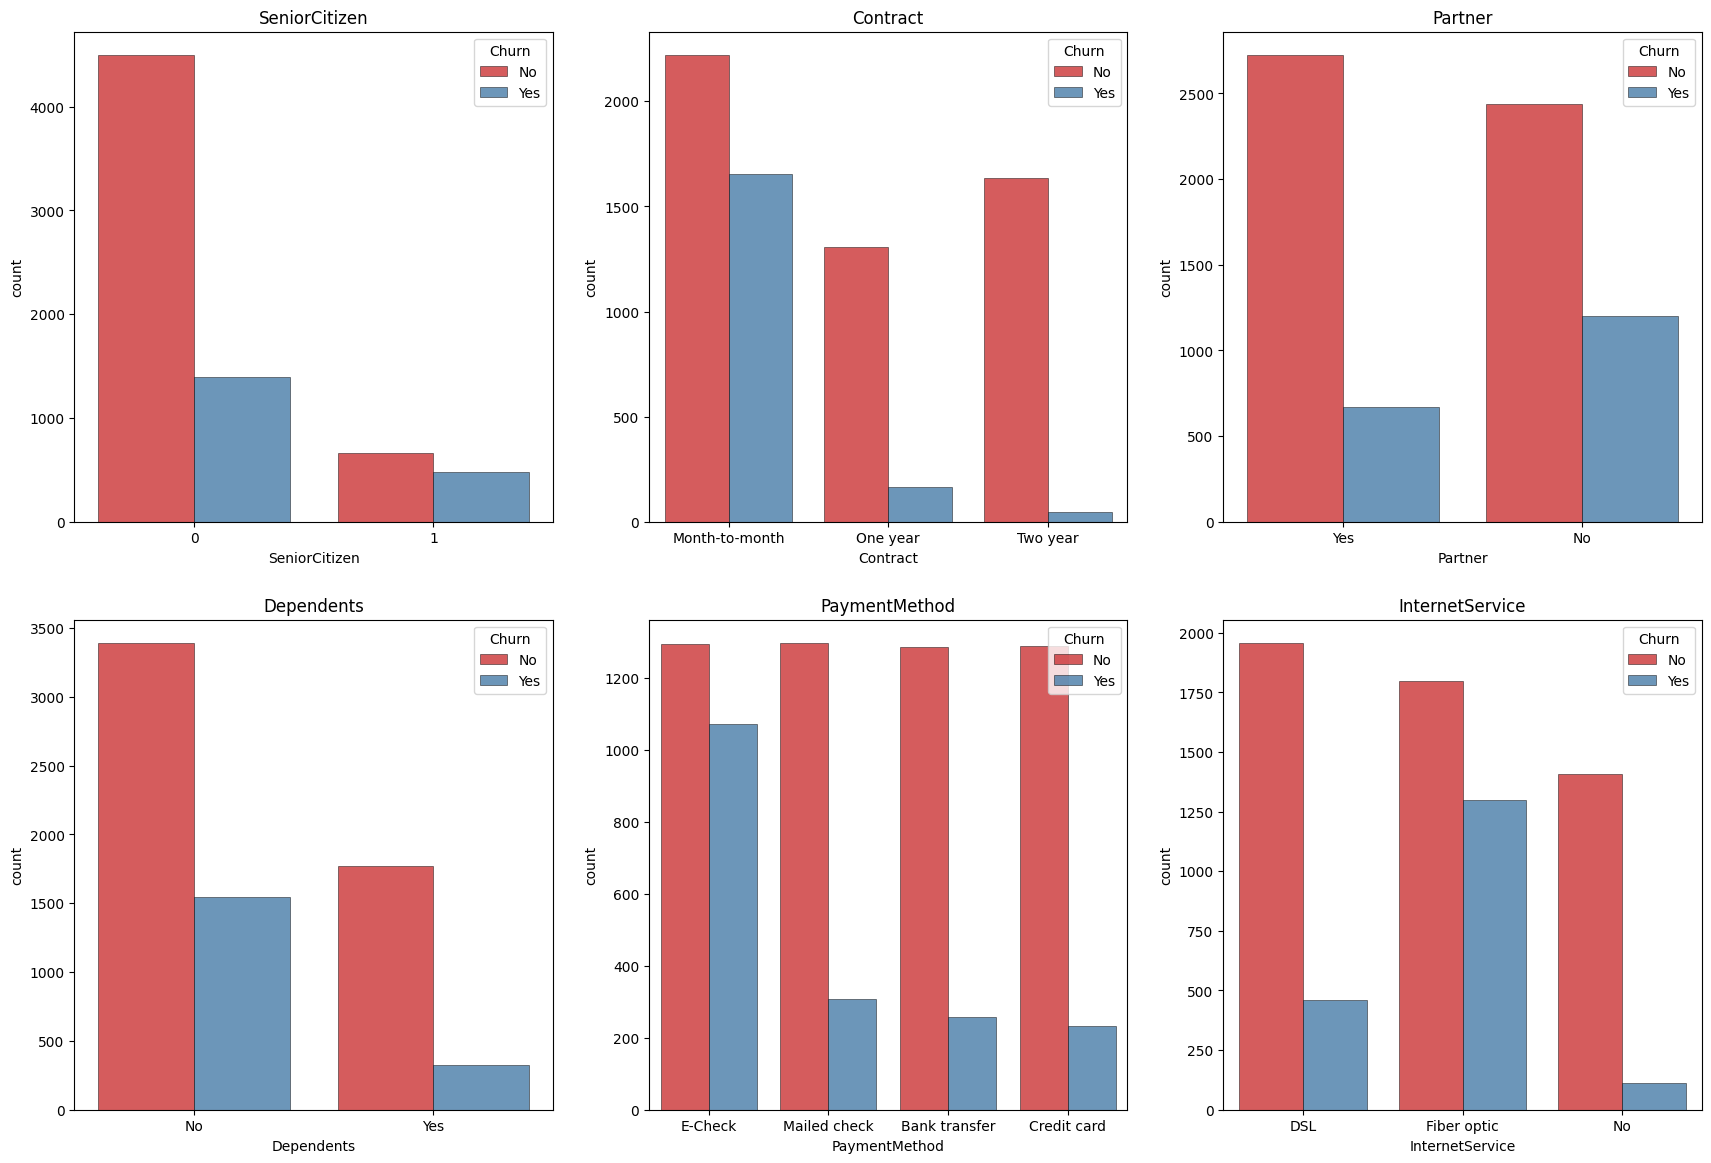

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_countplots(x, y, df):
    plots = {1: [1, 1], 2: [1, 2], 3: [1, 3], 4: [2, 2], 5: [2, 3], 6: [2, 3]}

    rows = plots[len(y)][0]
    columns = plots[len(y)][1]
    plt.figure(figsize=(7*columns, 7*rows))

    for i, j in enumerate(y):

        plt.subplot(rows, columns, i+1)
        ax = sns.countplot(x=j, hue=x, data=df, palette='Set1', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)

    # Save each countplot as an image file
    for i, j in enumerate(y):
        plt.subplot(rows, columns, i+1)
        plt.savefig(f'countplot_{j}.png')  # Save countplot as image
    return plt.show()

# Generate countplots for various features.
generate_countplots("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], cc_data)


In [35]:
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No
7041,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [36]:
cc_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No
7041,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


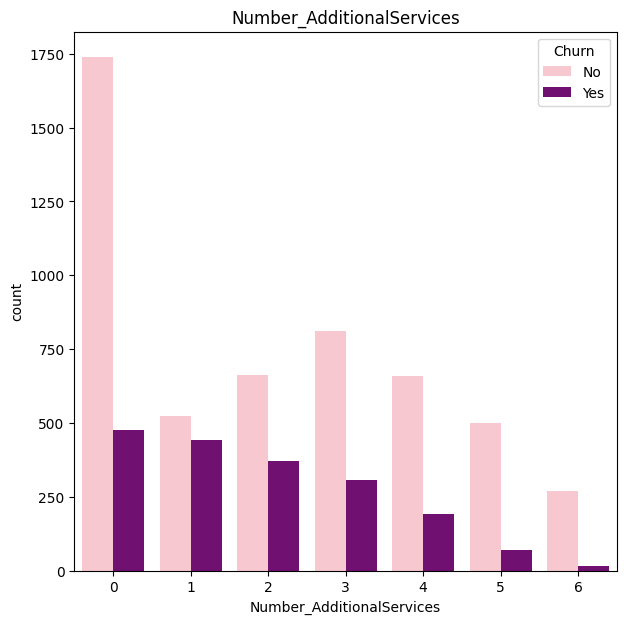

In [37]:
# Generate a new feature "Number_AdditionalServices" by summing up the number of add-on services consumed
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
cc_data['Number_AdditionalServices'] = data1[additional_services].apply(lambda row: sum(row == 'Yes'), axis=1)

# Define the countplot function
def countplot(x, y, df):
    rows = len(y)
    columns = 1
    plt.figure(figsize=(7*columns, 7*rows))
    colors = ["pink", "purple"]
    for i, j in enumerate(y):
        plt.subplot(rows, columns, i+1)
        ax = sns.countplot(x=j, hue=x, data=df, palette=colors)
        ax.set_title(j)
    plt.show()

# Generate a countplot for the new feature
countplot('Churn', ['Number_AdditionalServices'], cc_data)

In [38]:
cc_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No,1
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,3
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,5
7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No,4
7040,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No,1
7041,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0


<ipython-input-39-d268b0a4881f>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



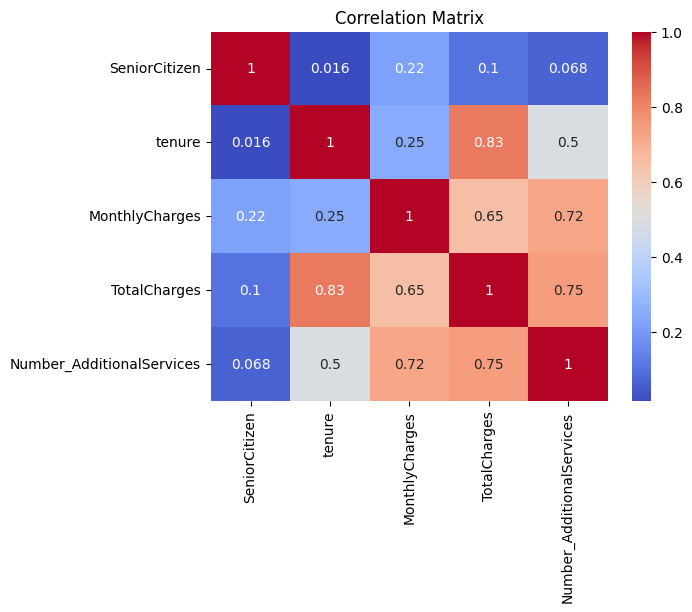

In [39]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data1.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

<ipython-input-40-b719e7e9584f>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



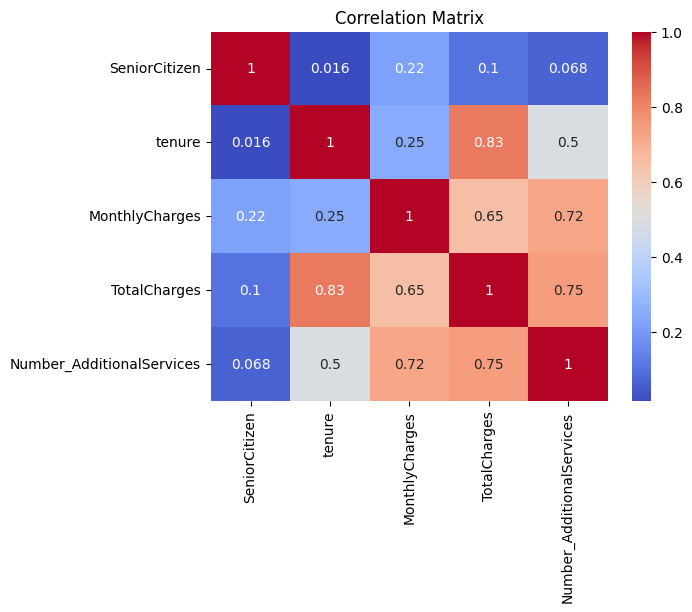

In [40]:
# compute the correlation matrix
corr_matrix = data1.corr()

# create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# set the title
plt.title('Correlation Matrix')

# show the plot
plt.show()

In [41]:
import pandas as pd
ht_data = cc_data.copy()

Hypothesis Testing

1.	Does the choice of internet provider impact the rate at which customers discontinue their subscription?

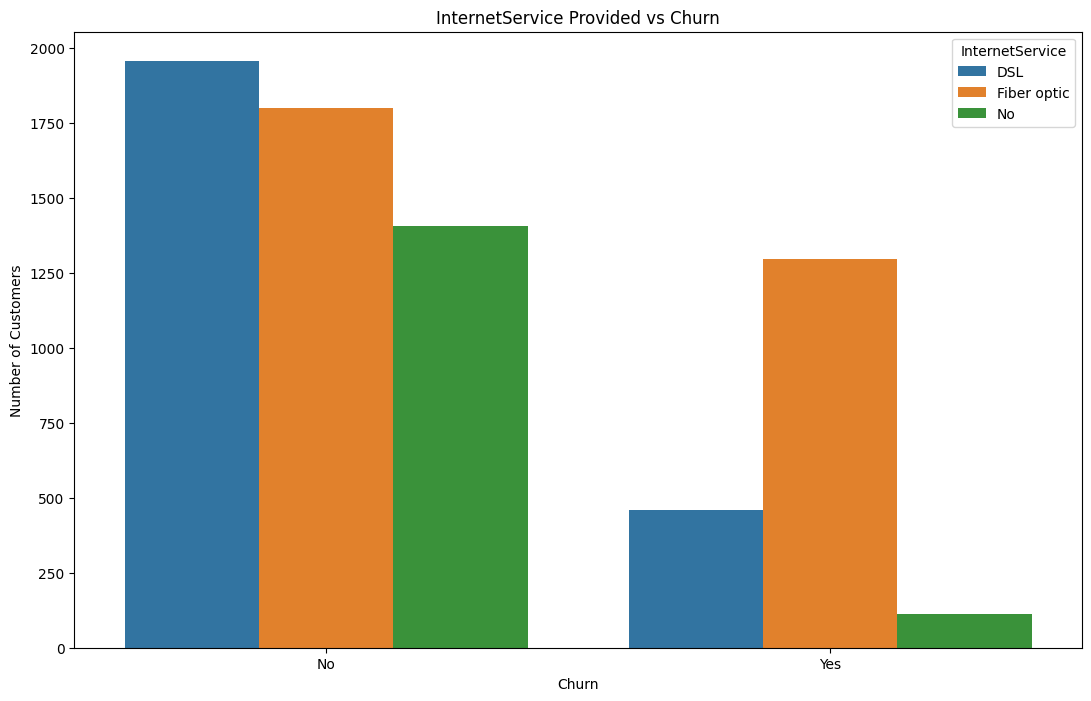

In [42]:
# Group by internet service type and churn, counting occurrences
int_type = ht_data.groupby(["InternetService", "Churn"]).size().reset_index(name="Count")

# Plotting
plt.figure(figsize=(13, 8))
sns.barplot(x="Churn", y="Count", hue="InternetService", data=int_type)
plt.title("InternetService Provided vs Churn")
plt.ylabel("Number of Customers")
plt.show()


Testing #1

In [48]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame containing internet service and churn using ht_data
chi2_df = ht_data[["InternetService", "Churn"]]

# Create a contingency table
contingency_table = pd.crosstab(chi2_df['InternetService'], chi2_df['Churn'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print chi-square test results
print('Chi-Square Test Results:')
print(f'Chi2 Statistic: {chi2}')
print(f'P-value: {p}')

Chi-Square Test Results:
Chi2 Statistic: 728.6956143058694
P-value: 5.831198962237274e-159


2.	Is there a higher likelihood of customer churn among those who opt for paperless billing?
Hypothesis #2:
H0: The implementation of paperless billing has no impact on the rate at which customers discontinue their services.
H1: those who opt for paperless billing have a higher likelihood of churning in comparison to those who get a paper bill.

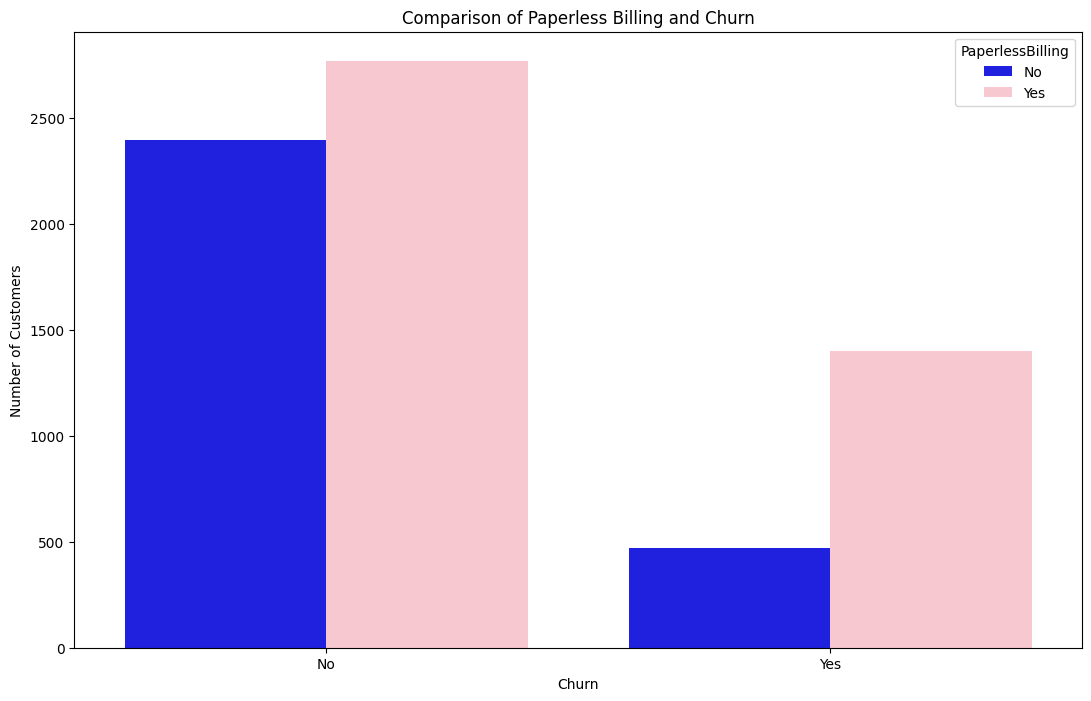

In [51]:
# Group by paperless billing and churn, counting occurrences
billing_type = ht_data.groupby(by=["PaperlessBilling", "Churn"], as_index=False)["Churn"].value_counts(ascending=False)

# Plotting with pink and blue colors
plt.figure(figsize=(13, 8))
sns.barplot(x="Churn", y="count", data=billing_type, hue="PaperlessBilling", palette={"Yes": "pink", "No": "blue"})
plt.title("Comparison of Paperless Billing and Churn")
plt.ylabel("Number of Customers")
plt.show()


Testing #2

In [49]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi_square_test(df, feature1, feature2):
    # Create a DataFrame containing the specified features
    chi2_df = df[[feature1, feature2]]

    # Create a contingency table
    contingency_table = pd.crosstab(chi2_df[feature1], chi2_df[feature2])

    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Print chi-square test results
    print(f'Chi-Square Test Results for Hypotheses Testing:')
    print(f'{feature1} vs {feature2}')
    print(f'Chi2 Statistic: {chi2}')
    print(f'P-value: {p}')
    print('\n')

# Call the function with the specified features
chi_square_test(ht_data, "PaperlessBilling", "Churn")


Chi-Square Test Results for Hypotheses Testing:
PaperlessBilling vs Churn
Chi2 Statistic: 256.87490836218717
P-value: 8.236203353962564e-58




3.	Does the duration of a customer's stay have an impact on the rate at which they discontinue their subscription or service?
Hypothesis 3:
H0: The duration of a customer's tenure has no impact on the rate at which they discontinue their services.
H1: those with longer tenure exhibit lower turnover rates compared to those with shorter tenure.


<ipython-input-53-f8c5f8a26500>:3: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



Text(0.5, 1.0, 'Tenure vs Churn')

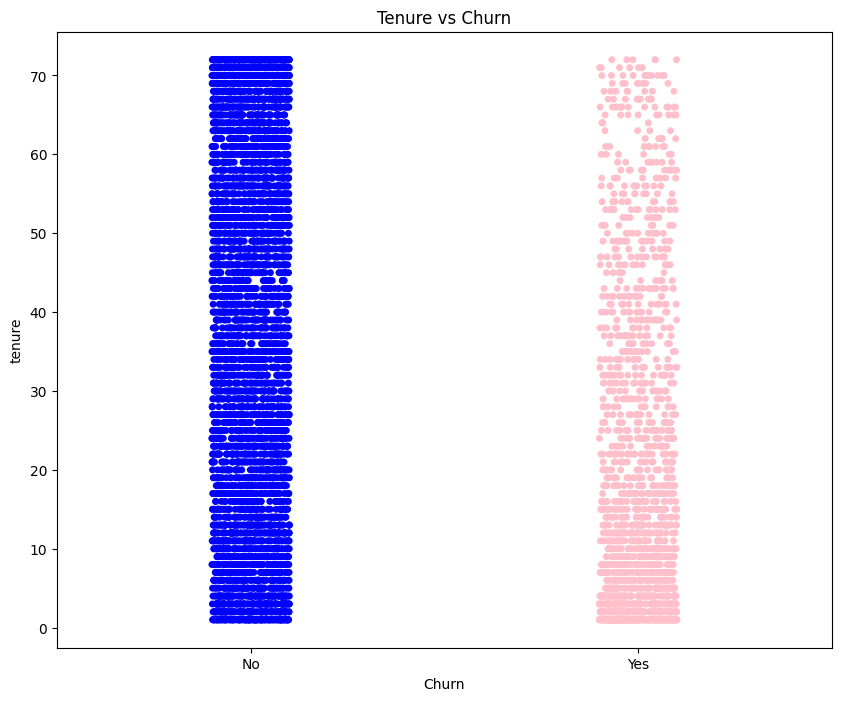

In [53]:
plt.figure(figsize=(10, 8))
# Make a strip plot with pink and blue colors
sns.stripplot(x="Churn", y="tenure", data=ht_data, palette={"Yes": "pink", "No": "blue"})
plt.title("Tenure vs Churn")


Testing #3

In [50]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi_square_test(df, feature1, feature2):
    # Create a DataFrame containing the specified features
    chi2_df = df[[feature1, feature2]]

    # Create a contingency table
    contingency_table = pd.crosstab(chi2_df[feature1], chi2_df[feature2])

    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Print chi-square test results
    print(f'Chi-Square Test Results for Hypotheses Testing:')
    print(f'{feature1} vs {feature2}')
    print(f'Chi2 Statistic: {chi2}')
    print(f'P-value: {p}')
    print('\n')

# Create a DataFrame containing tenure and churn using ht_data
chi2_df_tenure = ht_data[["tenure", "Churn"]]

# Replace string values with numeric values
chi2_df_tenure["Churn"].replace({"No": 1, "Yes": 2}, inplace=True)

# Call the function with the specified features
chi_square_test(chi2_df_tenure, "tenure", "Churn")

Chi-Square Test Results for Hypotheses Testing:
tenure vs Churn
Chi2 Statistic: 1060.2925967496435
P-value: 3.471813048469505e-176




<ipython-input-50-322ac64ab7c9>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



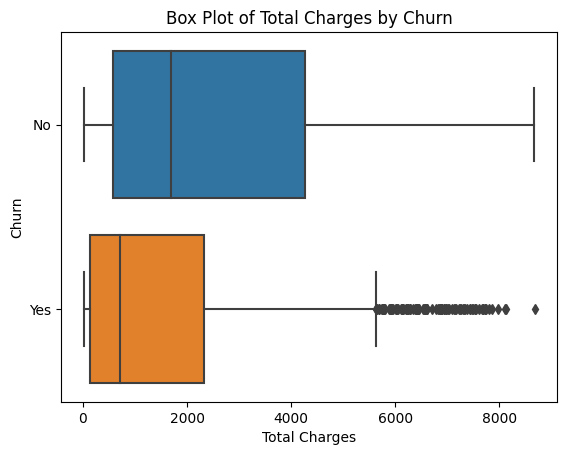

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot using Seaborn's boxplot() function
sns.boxplot(x="TotalCharges", y="Churn", data=cc_data)

# Set x-axis and y-axis labels and plot title
plt.xlabel("Total Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Total Charges by Churn")

# Display the plot
plt.show()


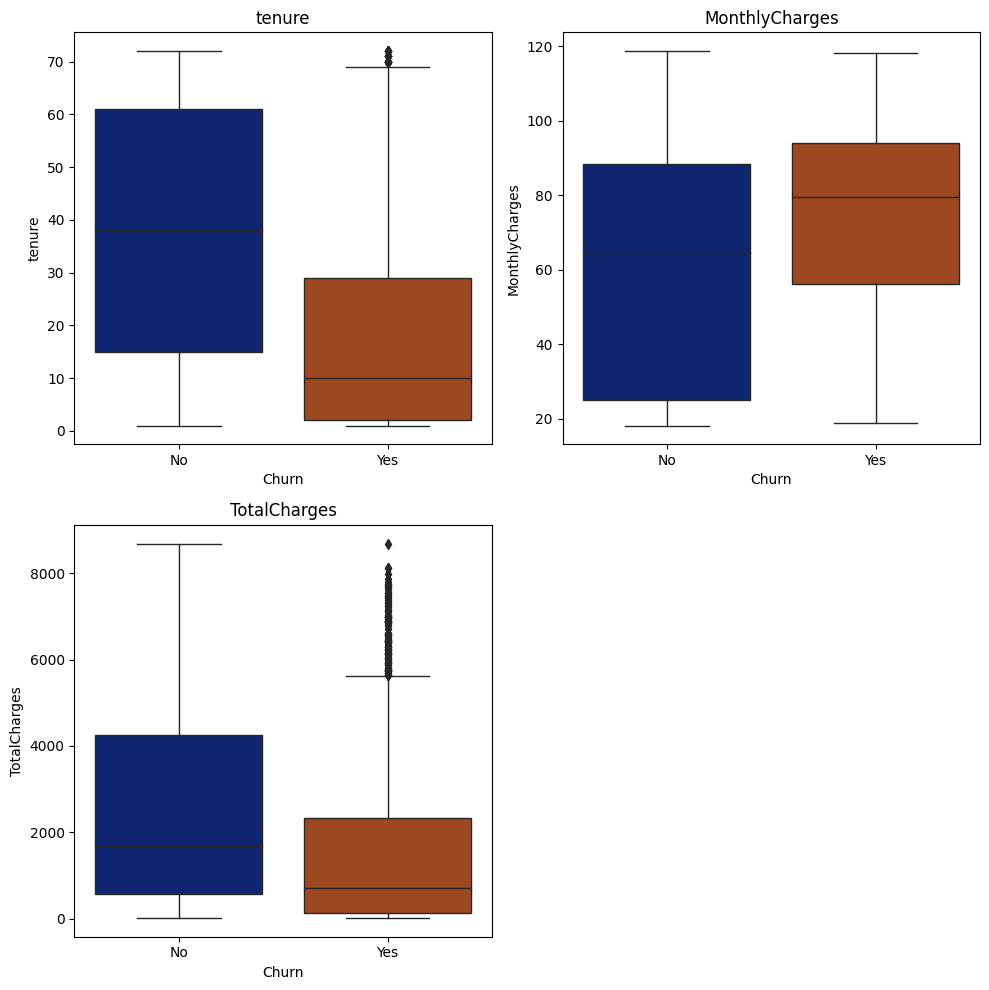

In [ ]:
# Lets work on generating boxplots
import matplotlib.pyplot as plt
import seaborn as sns
def create_boxplots(x_label, y_labels, data):
    num_plots = len(y_labels)
    rows = (num_plots // 2) + (num_plots % 2)
    cols = 2
    plt.figure(figsize=(5 * cols, 5 * rows))
    for i, variable in enumerate(y_labels):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(x=x_label, y=variable, data=data, palette="dark", linewidth=1)
        plt.title(variable)
    plt.tight_layout()
    plt.show()
create_boxplots("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], cc_data)


Skewness of the Data

In [ ]:
# Checking Skew data
# Checking kurtosis (amount of data in the tail)
# Clipping outliers for skewed features with low data in the tail

from scipy.stats import skew
from scipy.stats import kurtosis

def get_outliers_clipped(dataframe, col_name):
    """
    Function to clip outliers and handle them for categorical features
    """
    dataframe = dataframe.copy()
    q25 = dataframe[col_name].quantile(0.25)
    q75 = dataframe[col_name].quantile(0.75)
    iqr = q75 - q25
    upper_limit = q75 + 1.5 * iqr
    lower_limit = q25 - 1.5 * iqr
    outlier_idx = (dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)
    print(round(100 * outlier_idx.sum() / len(dataframe), 2), "% outliers clipped in feature", col_name)
    dataframe.loc[dataframe.loc[:, col_name] > upper_limit, col_name] = upper_limit
    dataframe.loc[dataframe.loc[:, col_name] < lower_limit, col_name] = lower_limit
    return dataframe

numeric_cols = cc_data.select_dtypes(include=['float64', 'int64'])
skew_values = skew(numeric_cols)
kurtosis_values = kurtosis(numeric_cols)

df_clipped = cc_data.copy()

for i, col in enumerate(numeric_cols):
    print('Column:', col)
    print('Skew:', skew_values[i])
    print('Kurtosis:', kurtosis_values[i])

    if skew_values[i] > 1.0:
        skewness = 'Positive'
    elif skew_values[i] < -1:
        skewness = 'Negative'
    else:
        skewness = 'No'

    if kurtosis_values[i] > 1.5:
        kurtic = 'Leptokurtic'
    elif kurtosis_values[i] < -1.5:
        kurtic = 'Platykurtic'
    else:
        kurtic = 'Mesokurtic'

    print('Skewness:', skewness)
    print('Kurtosis:', kurtic)

    if (skewness == 'Positive' or skewness == 'Negative') and (kurtic == 'Mesokurtic' or kurtic == 'Platykurtic'):
        df_clipped = get_outliers_clipped(df_clipped, col)

    print()


Column: SeniorCitizen
Skew: 1.8307119269100947
Kurtosis: 1.3515061593308735
Skewness: Positive
Kurtosis: Mesokurtic
16.24 % outliers clipped in feature SeniorCitizen

Column: tenure
Skew: 0.23768011839839964
Kurtosis: -1.3876891061975711
Skewness: No
Kurtosis: Mesokurtic

Column: MonthlyCharges
Skew: -0.22205554798978874
Kurtosis: -1.2561165516571853
Skewness: No
Kurtosis: Mesokurtic

Column: TotalCharges
Skew: 0.9614373590490068
Kurtosis: -0.23248709758655117
Skewness: No
Kurtosis: Mesokurtic

Column: Number_AdditionalServices
Skew: 0.4523318856306221
Kurtosis: -0.9641213684389718
Skewness: No
Kurtosis: Mesokurtic



Lets plot again

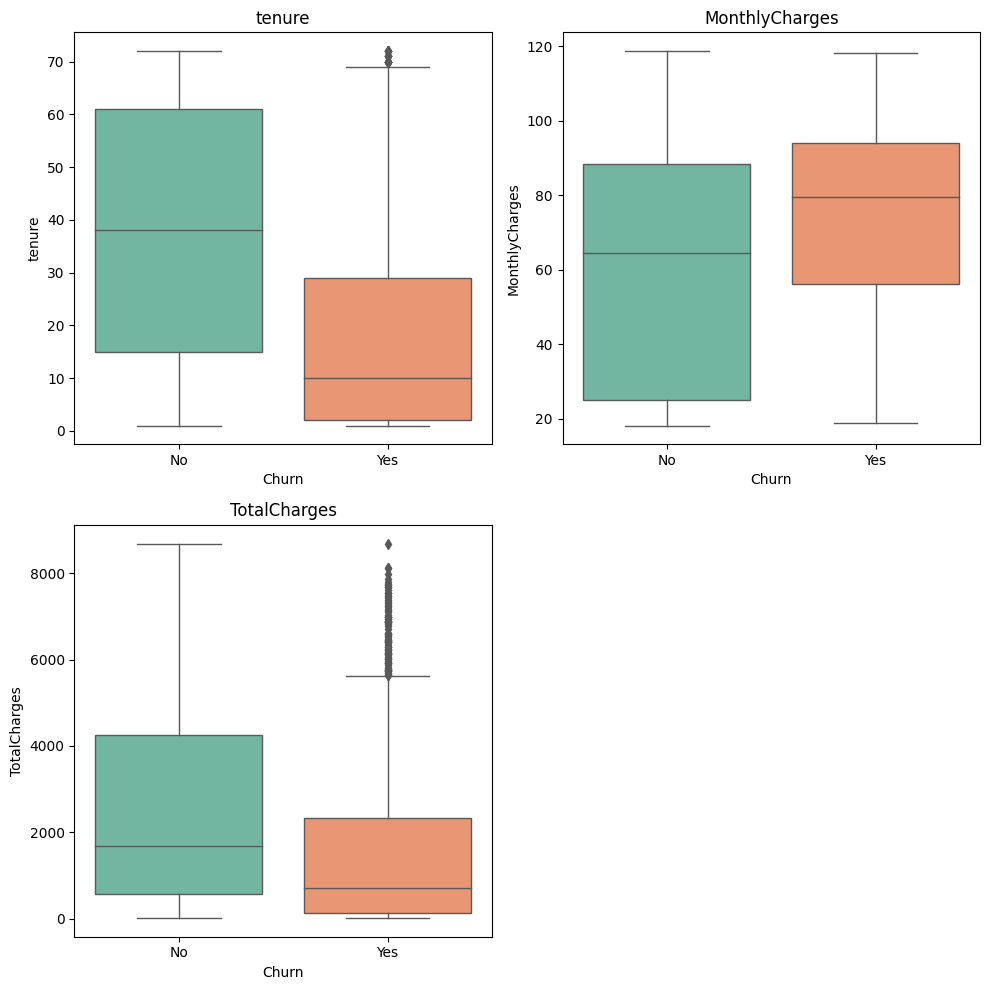

In [ ]:
# Lets work on generating boxplots
import matplotlib.pyplot as plt
import seaborn as sns
def create_boxplots(x, y, data):
    num_plots = len(y)
    rows = (num_plots // 2) + (num_plots % 2)
    cols = 2
    plt.figure(figsize=(5 * cols, 5 * rows))
    for i, var in enumerate(y):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(x=x, y=var, data=data, palette="Set2", linewidth=1)
        plt.title(var)

    plt.tight_layout()
    plt.show()
create_boxplots("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], df_clipped)

IQR

In [ ]:
# Display the modified dataset without the specified columns
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No,1
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,3
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,5
7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No,4
7040,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No,1
7041,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0


2.4.2. Label Encoding

In [ ]:
# Apply label encoding to the specified columns
encoded_columns = ['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def perform_label_encoding(columns, dataset):
    dataset = dataset.copy()  # Create a copy of the dataset
    for col in columns:
        dataset.loc[:, col] = dataset.loc[:, col].map({'Yes': 1, 'No': 0})
    return dataset

# Apply label encoding to the dataset
data1 = perform_label_encoding(encoded_columns, data1)

# Perform label encoding for the 'gender' column
data1.loc[:, 'gender'] = data1.loc[:, 'gender'].map({'Female': 1, 'Male': 0}).copy()

# Display the modified dataset
data1


<ipython-input-196-d733e927c936>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-196-d733e927c936>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-196-d733e927c936>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-196-d733e927c936>:7: DeprecationWarning:

In a future vers

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,1,0,1,0,1.0,0,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,1,E-Check,29.85,29.85,0,1
1,0,0,0,0,34.0,1,No,DSL,Yes,No,...,No,No,No,One year,0,Mailed check,56.95,1889.50,0,2
2,0,0,0,0,2.0,1,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,2
3,0,0,0,0,45.0,0,No phone service,DSL,Yes,No,...,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0,3
4,1,0,0,0,2.0,1,No,Fiber optic,No,No,...,No,No,No,Month-to-month,1,E-Check,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,5
7039,1,0,1,1,72.0,1,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,1,Credit card,103.20,7362.90,0,4
7040,1,0,1,1,11.0,0,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,1,E-Check,29.60,346.45,0,1
7041,0,1,1,0,4.0,1,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,0


2.4.3 One-Hot-Encoding

In [ ]:
# Perform One-Hot Encoding for identified columns
one_hot_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices']

df_encoded = pd.get_dummies(data1, columns=one_hot_columns)
df_encoded


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Credit card,PaymentMethod_E-Check,PaymentMethod_Mailed check,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6
0,1,0,1,0,1.0,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,34.0,1,0,56.95,1889.50,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,2.0,1,1,53.85,108.15,1,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,45.0,0,0,42.30,1840.75,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,2.0,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,1,84.80,1990.50,0,...,0,0,1,0,0,0,0,0,1,0
7039,1,0,1,1,72.0,1,1,103.20,7362.90,0,...,1,0,0,0,0,0,0,1,0,0
7040,1,0,1,1,11.0,0,1,29.60,346.45,0,...,0,1,0,0,1,0,0,0,0,0
7041,0,1,1,0,4.0,1,1,74.40,306.60,1,...,0,0,1,1,0,0,0,0,0,0


2.4.4 Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Choose the columns that needs Min-Max Scaling for normalization
scaling_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a DataFrame with the selected columns for scaling
scaling_df = df_encoded[scaling_columns]
scaling_df

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,29.85
1,34.0,56.95,1889.50
2,2.0,53.85,108.15
3,45.0,42.30,1840.75
4,2.0,70.70,151.65
...,...,...,...
7038,24.0,84.80,1990.50
7039,72.0,103.20,7362.90
7040,11.0,29.60,346.45
7041,4.0,74.40,306.60


In [ ]:

# Create a DataFrame with the remaining columns
remaining_df = df_encoded.drop(columns=scaling_columns)
remaining_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,PaymentMethod_Credit card,PaymentMethod_E-Check,PaymentMethod_Mailed check,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6
0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
7039,1,0,1,1,1,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
7040,1,0,1,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
7041,0,1,1,0,1,1,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0


In [ ]:

# Perform Min-Max Scaling on the selected columns to normalse the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(scaling_df)

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=scaling_columns, index=remaining_df.index)
scaled_df

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [ ]:

# Concatenate the scaled features with the remaining columns
final_df = pd.concat([remaining_df, scaled_df], axis=1)
final_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0.000000,0.115423,0.001275
1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0.464789,0.385075,0.215867
2,0,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0.014085,0.354229,0.010310
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0.619718,0.239303,0.210241
4,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0.014085,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0.323944,0.662189,0.227521
7039,1,0,1,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1.000000,0.845274,0.847461
7040,1,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0.140845,0.112935,0.037809
7041,0,1,1,0,1,1,1,0,0,1,...,1,0,0,0,0,0,0,0.042254,0.558706,0.033210


2.4.5 Correlation

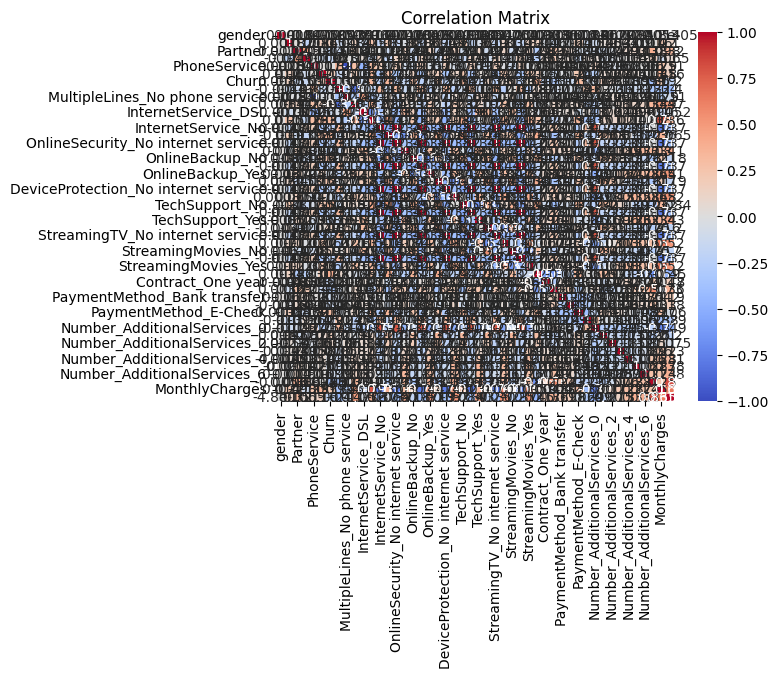

In [ ]:
# compute the correlation matrix
corr_matrix = final_df.corr()

# create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# set the title
plt.title('Correlation Matrix')

# show the plot
plt.show()

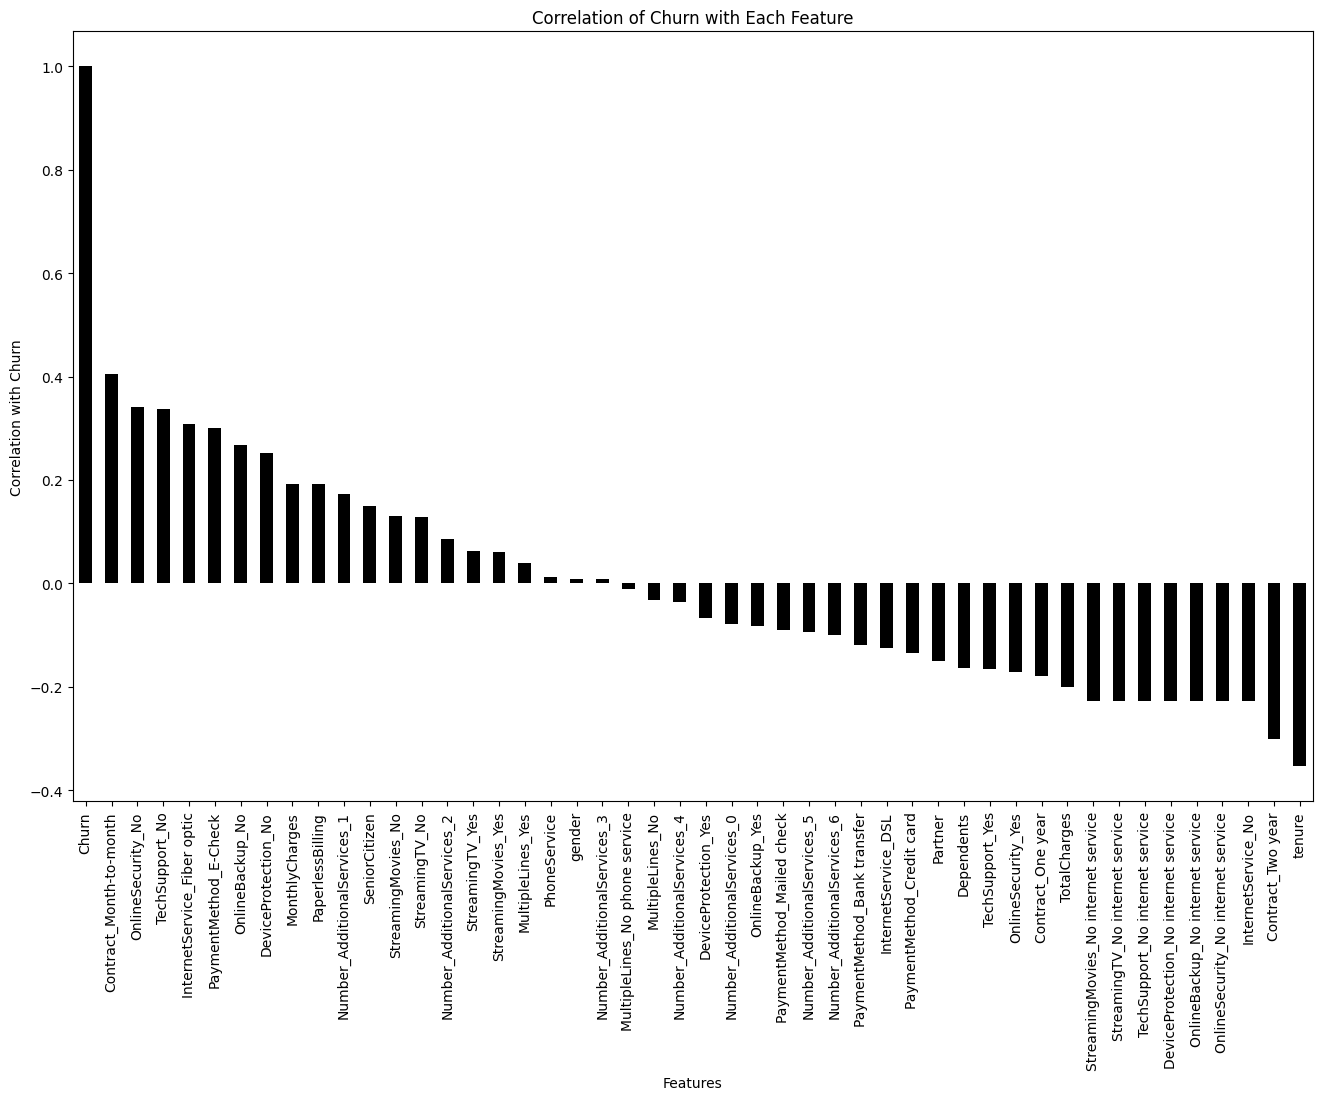

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Calculate the correlation of Churn with each of the remaining features
correlation = final_df.corr()['Churn'].sort_values(ascending=False)

# Plot the correlation values
plt.figure(figsize=(16, 10))
correlation.plot(kind='bar', color='black')  # Change the color to black
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Correlation of Churn with Each Feature')
plt.show()


2.5 Training and Testing

*Train Test Split* </br>
[80 20]

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X = final_df.drop('Churn', axis=1).values
y = final_df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_df=X
X_df

array([[1.        , 0.        , 1.        , ..., 0.        , 0.11542289,
        0.0012751 ],
       [0.        , 0.        , 0.        , ..., 0.46478873, 0.38507463,
        0.21586661],
       [0.        , 0.        , 0.        , ..., 0.01408451, 0.35422886,
        0.01031041],
       ...,
       [1.        , 0.        , 1.        , ..., 0.14084507, 0.11293532,
        0.03780868],
       [0.        , 1.        , 1.        , ..., 0.04225352, 0.55870647,
        0.03321025],
       [0.        , 0.        , 0.        , ..., 0.91549296, 0.86965174,
        0.78764136]])

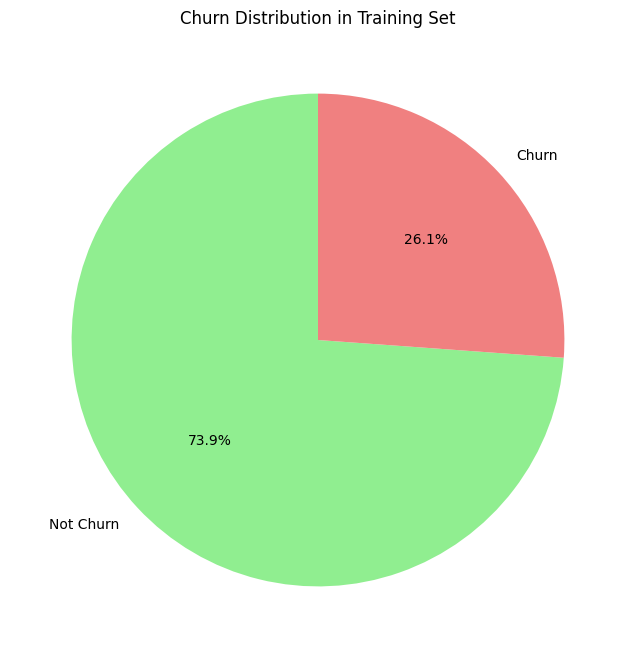

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Count the occurrences of each class in the training set
unique, counts = np.unique(y_train, return_counts=True)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Churn Distribution in Training Set')
plt.show()


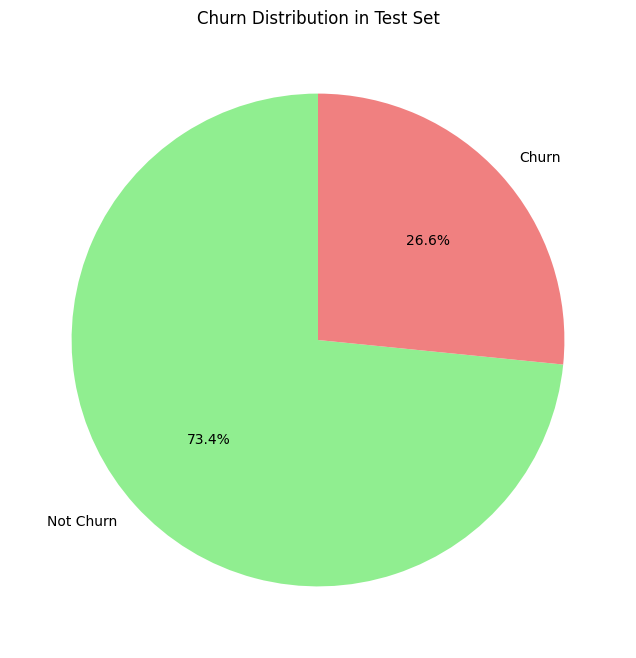

In [ ]:
# Count the occurrences of each class in the test set
unique_test, counts_test = np.unique(y_test, return_counts=True)

# Create a pie chart for the test set
plt.figure(figsize=(8, 8))
plt.pie(counts_test, labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Churn Distribution in Test Set')
plt.show()


EVALUATION Metrics

Install manually with the command
!pip install scikit-plot

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)

    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")

    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    plt.show()
    return print("")

In [ ]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, classifier_name):

    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='Blues_r', normalize=None, ax=ax)
    disp.ax_.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='Blues_r', normalize='true', ax=ax)
    disp.ax_.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()

    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred_knn)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")


In [ ]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.plot([0, 1], [0, 1], 'k--')  # Add the dotted line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.legend()
    plt.show()

    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')


In [ ]:
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    plt.plot(recall, precision, label=classifier_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.legend()
    plt.show()

    f1_score_result = f1_score(y_test, y_pred)
    auc_score_result = auc(recall, precision)

    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')


Model Selection

XGboost

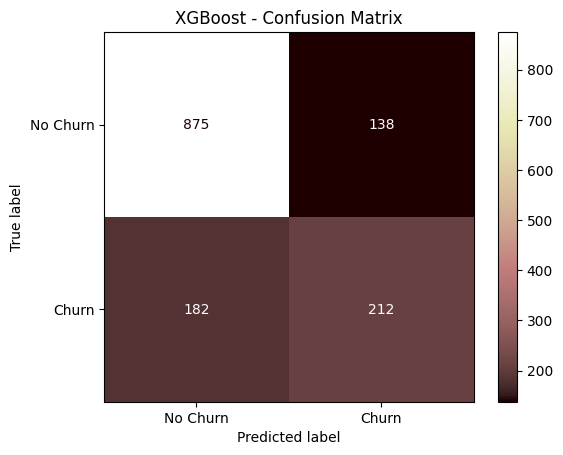

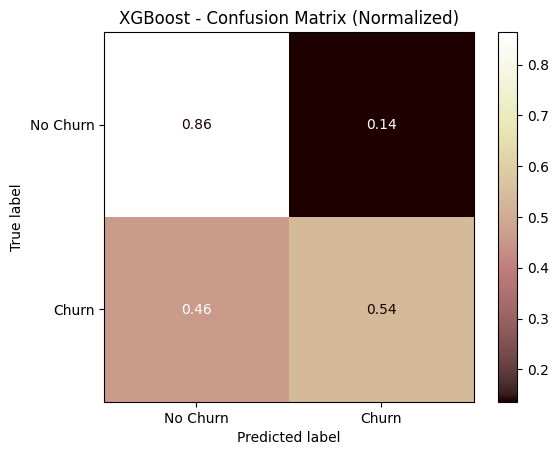

Accuracy Score Test: 0.7725657427149965
Accuracy Score Train: 0.9456 (as comparison)


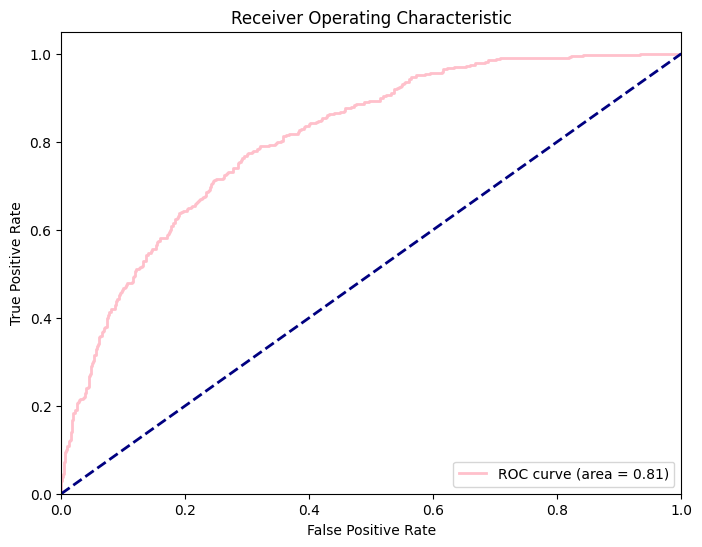

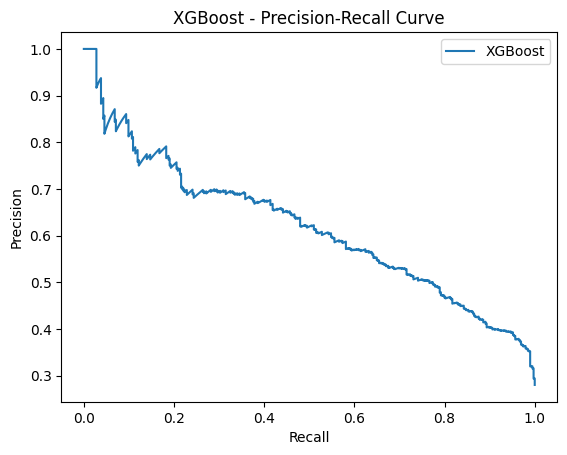

AUC Score (ROC): 0.8098125385220559
F1 Score: 0.5698924731182796
AUC Score (PR) for XGBoost: 0.6175979957703096


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load and preprocess your data
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Instantiate and train the XGBoost model
params = {'objective': 'binary:logistic', 'eval_metric': 'logloss'}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_round = 100
xgb_model = xgb.train(params, dtrain, num_round)

# Make predictions using the XGBoost model
y_pred_xgb_prob = xgb_model.predict(dtest)

# Convert probabilities to class labels using a threshold
threshold = 0.5
y_pred_xgb = [1 if prob > threshold else 0 for prob in y_pred_xgb_prob]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No Churn", "Churn"])
disp.plot(cmap='pink')  # Change color to 'Purples'
plt.title('XGBoost - Confusion Matrix')
plt.show()

# Calculate normalized confusion matrix
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Display normalized confusion matrix
disp_norm = ConfusionMatrixDisplay(conf_matrix_norm, display_labels=["No Churn", "Churn"])
disp_norm.plot(cmap='pink', values_format=".2f")  # Change color to 'Accent'
plt.title('XGBoost - Confusion Matrix (Normalized)')
plt.show()

# Evaluate the XGBoost model
accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb_train = accuracy_score(y_train, xgb_model.predict(dtrain) > threshold)  # Calculate train accuracy

roc_auc = roc_auc_score(y_test, y_pred_xgb_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb_prob)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb_prob)
f1 = f1_score(y_test, y_pred_xgb)

print(f'Accuracy Score Test: {accuracy_xgb_test}')
print(f'Accuracy Score Train: {accuracy_xgb_train} (as comparison)')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Change color to 'Purples'
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb_prob)
plt.plot(recall, precision, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost - Precision-Recall Curve')
plt.legend()
plt.show()

print(f'AUC Score (ROC): {roc_auc}')
print(f'F1 Score: {f1}')

from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb_prob)

# Calculate AUC score for precision-recall curve
auc_score_pr = auc(recall, precision)

print(f'AUC Score (PR) for XGBoost: {auc_score_pr}')


KNN

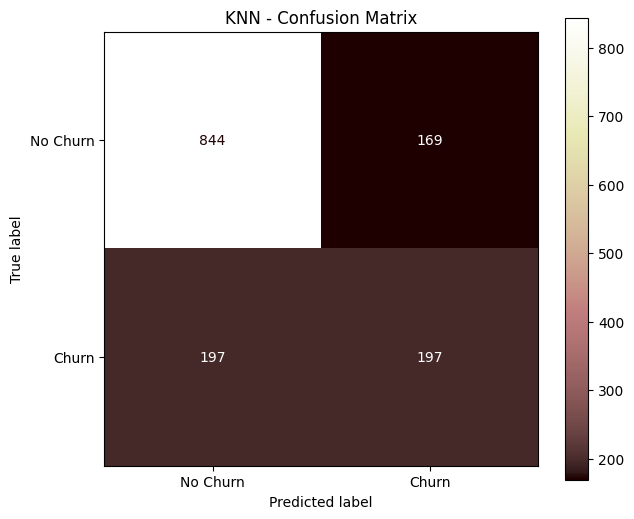

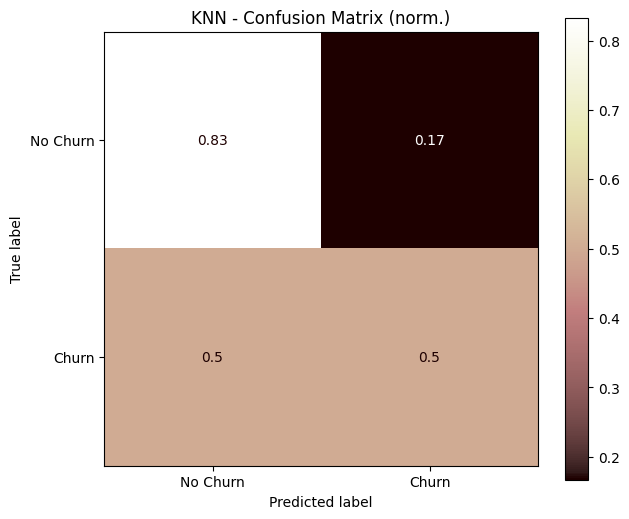

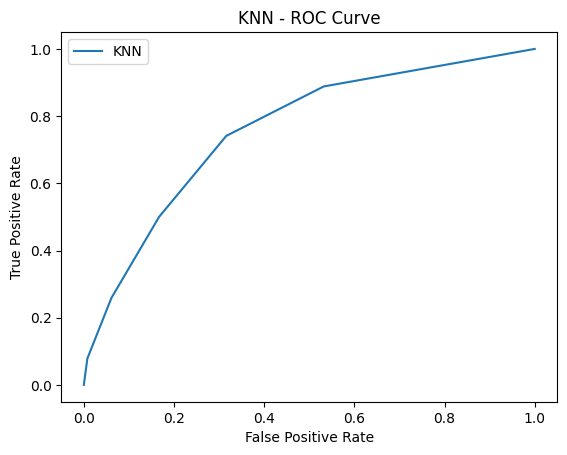

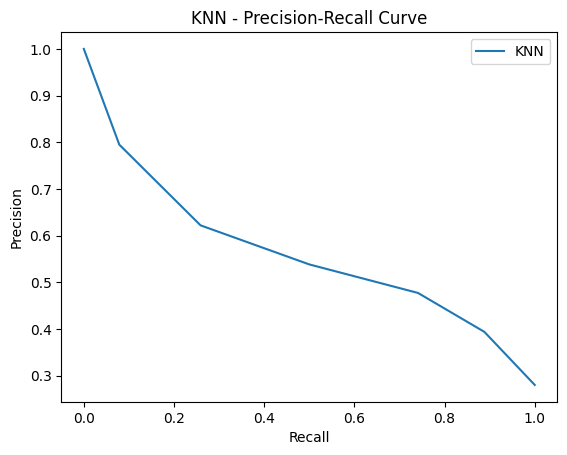

F1 Score: 0.518421052631579 
AUC Score (PR): 0.5622681678707674



In [ ]:
#from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, plot_precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and train the KNN classifier based on the training set
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained classifier on the test set
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

# Plot model evaluations - Confusion Matrix
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, 'KNN')

# Plot model evaluations - ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.legend()
plt.show()

# Plot model evaluations - Precision-Recall Curve and F1 Score
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')


Logistic Regression

In [ ]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, classifier_name, y_pred=None):
    fig, ax = plt.subplots(figsize=(7, 6))
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='pink', ax=ax)  # Change color to 'Purples'
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='pink', normalize='true', ax=ax)  # Change color to 'Purples'
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()

    if y_pred is not None:
        accuracy = (y_test == y_pred).mean()
        print(f'Accuracy Score Test: {accuracy}')
        print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')

    return print("")


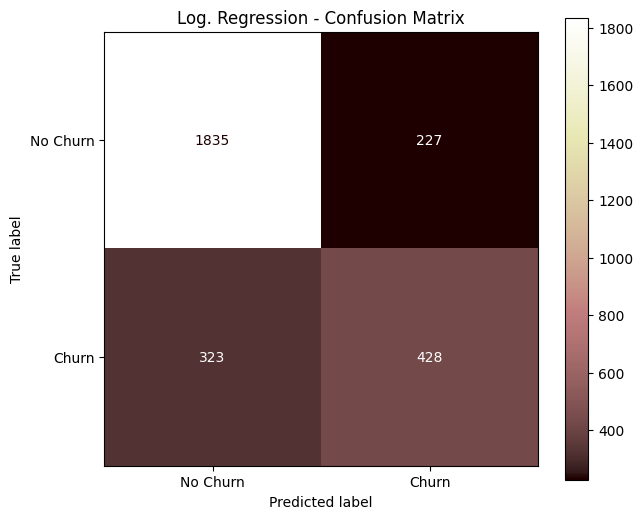

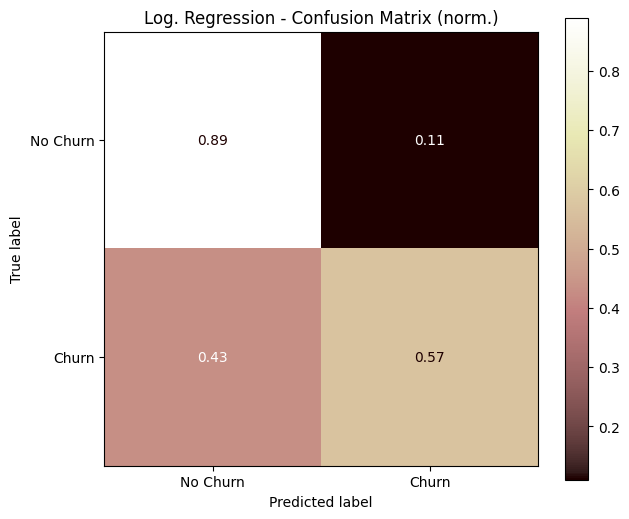

Accuracy Score Test: 0.8044792036971206
Accuracy Score Train: 0.803270917278976 (as comparison)



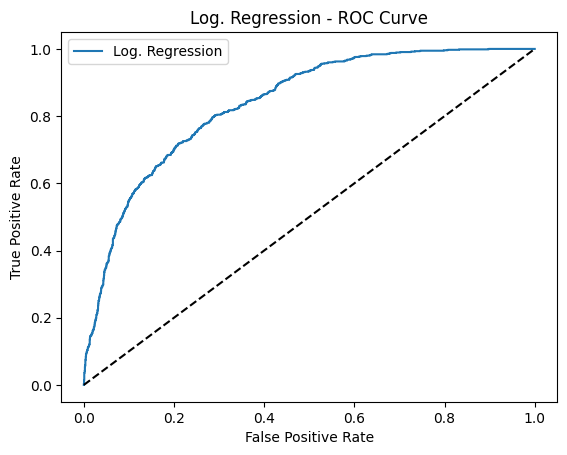

AUC Score (ROC): 0.8382257216695232



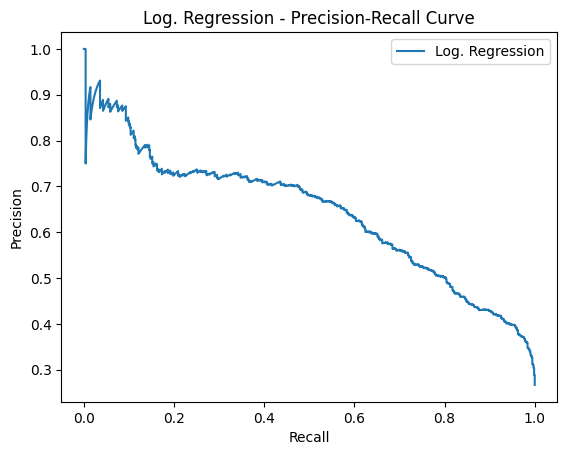

F1 Score: 0.6088193456614509 
AUC Score (PR): 0.6418225287658583



In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train the logistic regression model based on the training set.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained logistic regression model on the test set.
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

# Plot model evaluations for logistic regression.
#feature_weights(X, logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, 'Log. Regression', y_pred_logreg)
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')

Random Forest

In [ ]:
# Define a function that plots the confusion matrix for a classifier and the train and test accuracy
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='pink', ax=ax)
    disp.ax_.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='pink', normalize='true', ax=ax)
    disp.ax_.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = classifier.score(X_train, y_train)

    print(f'Accuracy Score Test: {accuracy_test}')
    print(f'Accuracy Score Train: {accuracy_train} (as comparison)')


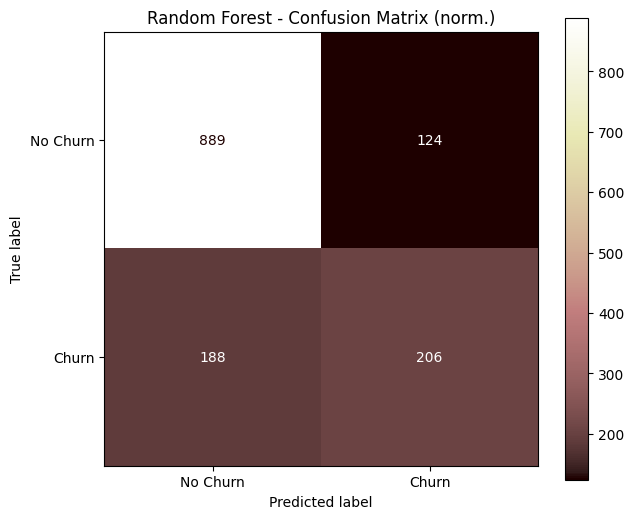

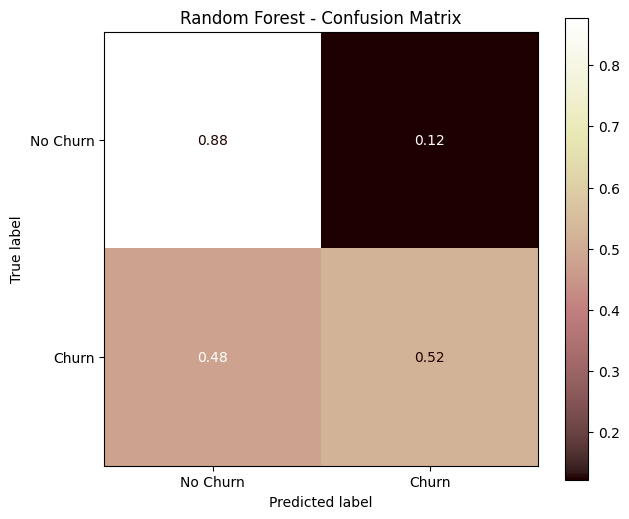

Accuracy Score Test: 0.7782515991471215
Accuracy Score Train: 0.9975111111111111 (as comparison)


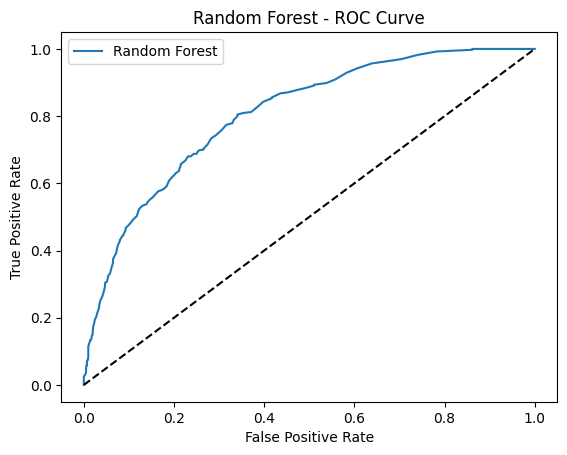

AUC Score (ROC): 0.8052136940584583



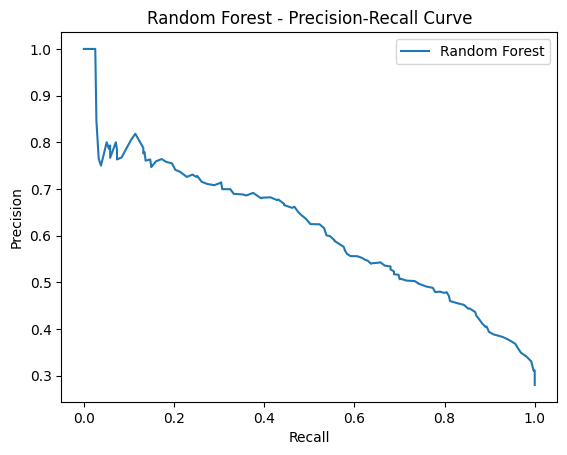

F1 Score: 0.569060773480663 
AUC Score (PR): 0.6123328227137332



In [ ]:
# Import Random Forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the random forest model based on the training set.
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf = rfc.predict(X_test)
y_pred_rf_prob = rfc.predict_proba(X_test)

# Evaluate and Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rfc, y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')


SVM

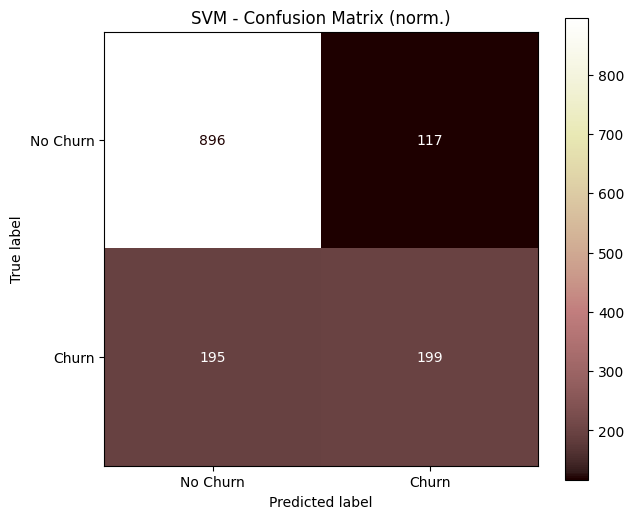

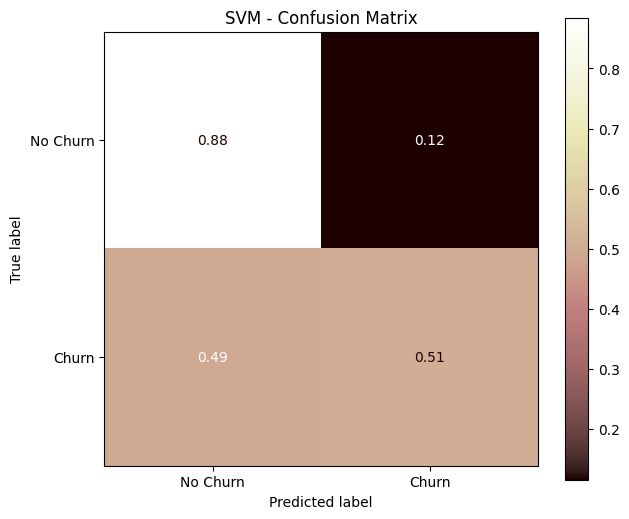

Accuracy Score Test: 0.7782515991471215
Accuracy Score Train: 0.8222222222222222 (as comparison)


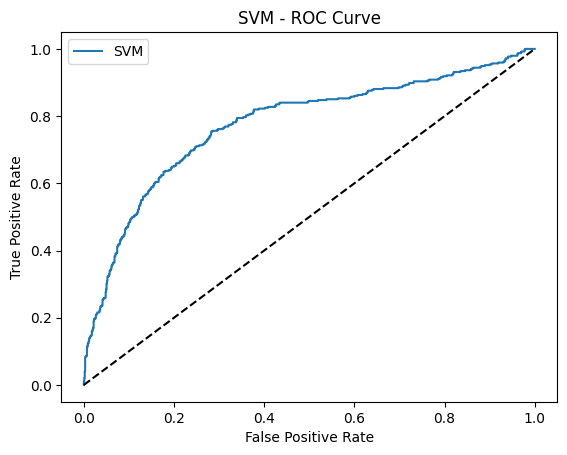

AUC Score (ROC): 0.7748520502502995



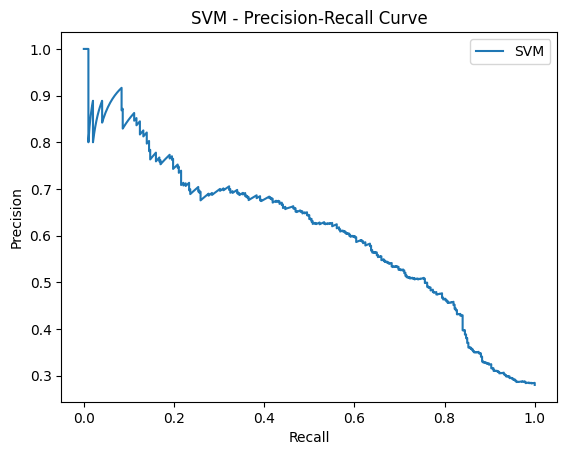

F1 Score: 0.5605633802816902 
AUC Score (PR): 0.609744447155704



In [ ]:
from sklearn.svm import SVC

# Instantiate and train the SVM model on the training set.
support_vector_m = SVC(kernel='rbf', probability=True)
support_vector_m.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')


Hyper Parameter

XGBoost with Hyperparameter GridSearchCV

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Load and preprocess your data
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Instantiate the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

# Instantiate and train the XGBoost model with GridSearchCV
xgb_grid = GridSearchCV(xgb_model, param_grid, cv=5)
xgb_grid.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = xgb_grid.best_params_
print("Best parameters:", best_params)

# Make predictions using the best model
y_pred_xgb_grid = xgb_grid.predict(X_test)

# Evaluate the XGBoost model with best parameters
accuracy_xgb_grid = accuracy_score(y_test, y_pred_xgb_grid)
print("Accuracy of XGBoost model with best parameters:", accuracy_xgb_grid)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy of XGBoost model with best parameters: 0.7882018479033405


Confusion Matrix:
[[892 121]
 [177 217]]


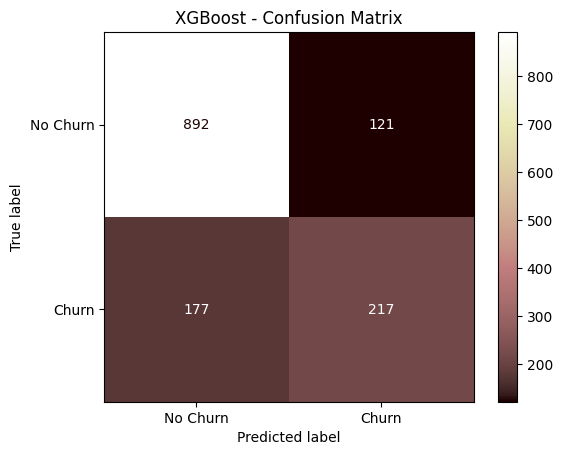

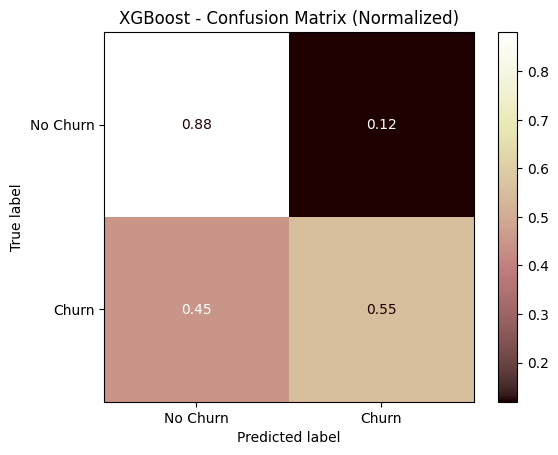

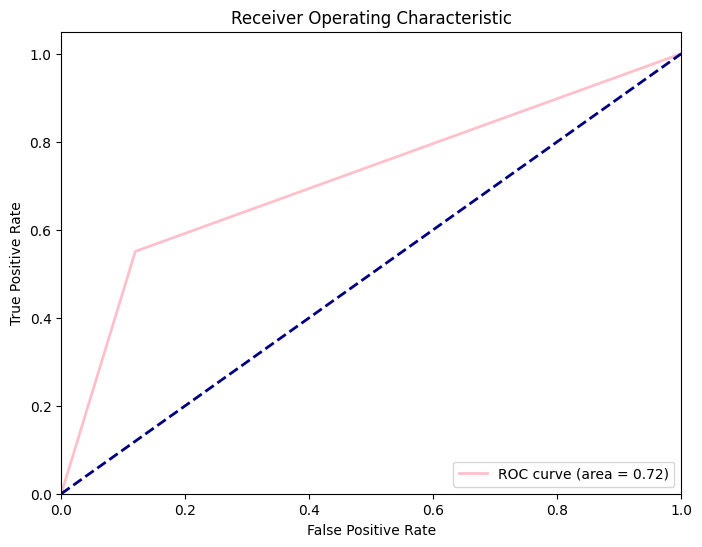

Accuracy Score Test: 0.7725657427149965
Accuracy Score Train: 0.9456 (as comparison)
AUC Score (ROC): 0.7156571173726329
F1 Score: 0.592896174863388
AUC Score (PR) for XGBoost: 0.6592864146000456


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb_grid)
# Print confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No Churn", "Churn"])
disp.plot(cmap='pink')
plt.title('XGBoost - Confusion Matrix')
plt.show()

# Calculate normalized confusion matrix
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Display normalized confusion matrix
disp_norm = ConfusionMatrixDisplay(conf_matrix_norm, display_labels=["No Churn", "Churn"])
disp_norm.plot(cmap='pink', values_format=".2f")
plt.title('XGBoost - Confusion Matrix (Normalized)')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_grid)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb_grid)
f1 = 2 * (precision * recall) / (precision + recall)

# Calculate AUC score for precision-recall curve
auc_score_pr = auc(recall, precision)

print(f'Accuracy Score Test: {accuracy_xgb_test}')
print(f'Accuracy Score Train: {accuracy_xgb_train} (as comparison)')
print(f'AUC Score (ROC): {roc_auc}')
print(f'F1 Score: {f1[1]}')  # Select the F1 score corresponding to the desired threshold
print(f'AUC Score (PR) for XGBoost: {auc_score_pr}')


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy Score Test: 0.7882018479033405


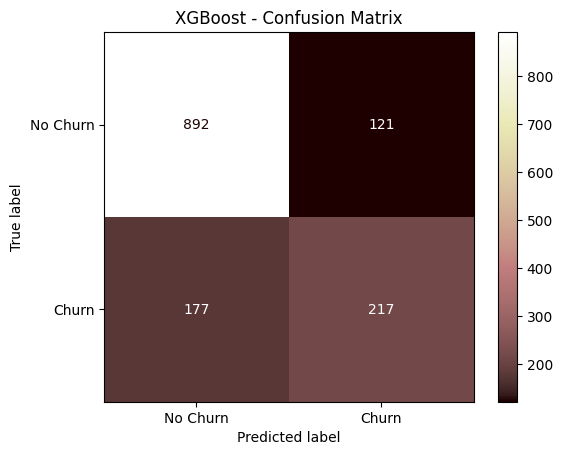

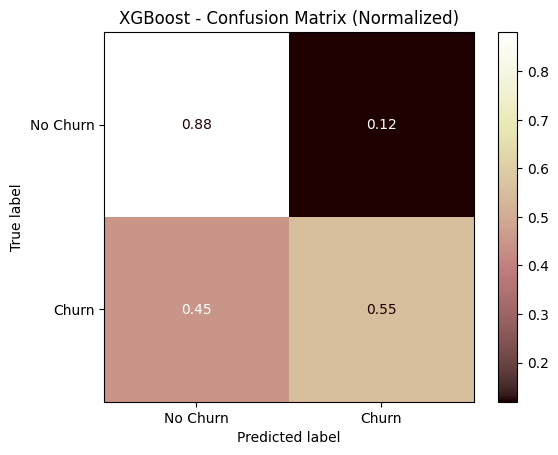

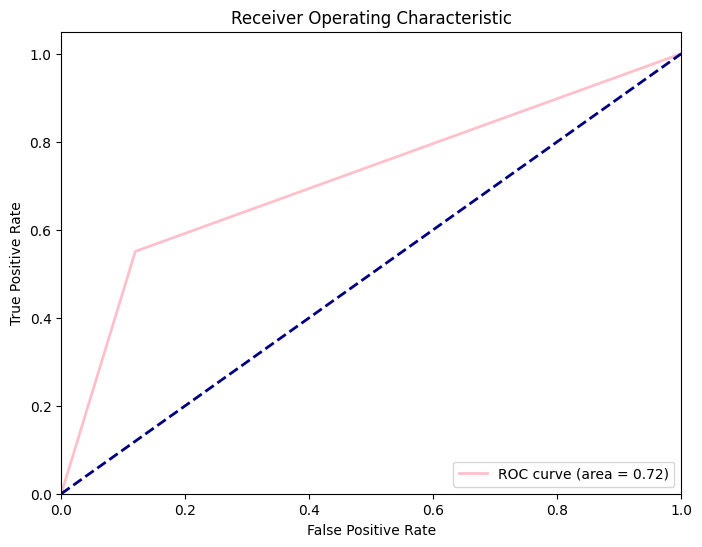

Accuracy Score Test: 0.7882018479033405
AUC Score (ROC): 0.7156571173726329
F1 Score: 0.592896174863388
AUC Score (PR) for XGBoost: 0.6592864146000456


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve,
    f1_score,
)

# Load and preprocess your data
#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Instantiate the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

# Instantiate and train the XGBoost model with GridSearchCV
xgb_grid = GridSearchCV(xgb_model, param_grid, cv=5)
xgb_grid.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = xgb_grid.best_params_
print("Best parameters:", best_params)

# Make predictions using the best model
y_pred_xgb_grid = xgb_grid.predict(X_test)

# Evaluate the XGBoost model with best parameters
accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb_grid)
print("Accuracy Score Test:", accuracy_xgb_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb_grid)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No Churn", "Churn"])
disp.plot(cmap='pink')
plt.title('XGBoost - Confusion Matrix')
plt.show()

# Calculate normalized confusion matrix
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Display normalized confusion matrix
disp_norm = ConfusionMatrixDisplay(conf_matrix_norm, display_labels=["No Churn", "Churn"])
disp_norm.plot(cmap='pink', values_format=".2f")
plt.title('XGBoost - Confusion Matrix (Normalized)')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_grid)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb_grid)
f1 = f1_score(y_test, y_pred_xgb_grid)

# Calculate AUC score for precision-recall curve
auc_score_pr = auc(recall, precision)

print(f'Accuracy Score Test: {accuracy_xgb_test}')
print(f'AUC Score (ROC): {roc_auc}')
print(f'F1 Score: {f1}')
print(f'AUC Score (PR) for XGBoost: {auc_score_pr}')

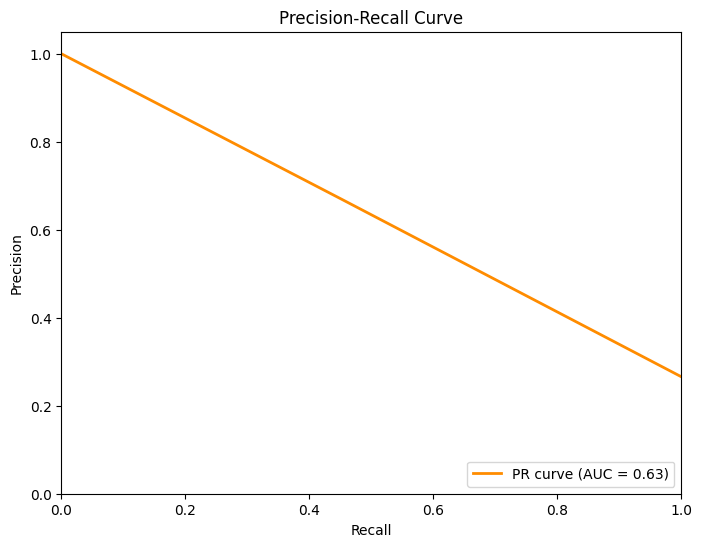

Accuracy Score Test: 0.771090047393365
Accuracy Score Train: 0.9492076391710687 (as comparison)
AUC Score (ROC): 0.6862785374728564
F1 Score: 0.5408271474019087
AUC Score (PR) for XGBoost: 0.6335542091218129


In [ ]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb_grid)
f1 = 2 * (precision * recall) / (precision + recall)

# Calculate AUC score for precision-recall curve
auc_score_pr = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (AUC = {auc_score_pr:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

# Display additional metrics
print(f'Accuracy Score Test: {accuracy_xgb_test}')
print(f'Accuracy Score Train: {accuracy_xgb_train} (as comparison)')
print(f'AUC Score (ROC): {roc_auc}')
print(f'F1 Score: {f1[1]}')  # Select the F1 score corresponding to the desired threshold
print(f'AUC Score (PR) for XGBoost: {auc_score_pr}')


In [ ]:
# Use Pandas' read_csv method to read the whole file in memory
# (it will fail on our first try)
# Name the returned data frame "data1"
import pandas as pd

data1 = pd.read_csv(CCPT_FILE, encoding='latin')
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# Assuming 'data1' is your copy of the original data before normalization
likely_churn_indices = [index for index, prediction in enumerate(y_pred_xgb_grid) if prediction == 1]
likely_churn_customers = data1.iloc[likely_churn_indices]

# Print the top ten records of likely churn customers
print(likely_churn_customers.head(2))

# Save the data of likely churn customers to a CSV file
likely_churn_customers.to_csv('likely_churn_customers.csv', index=False)

print(data1.columns)


    customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
6   1452-KIOVK   Male              0      No        Yes      22          Yes   
11  7469-LKBCI   Male              0      No         No      16          Yes   

   MultipleLines InternetService       OnlineSecurity  ...  \
6            Yes     Fiber optic                   No  ...   
11            No              No  No internet service  ...   

       DeviceProtection          TechSupport          StreamingTV  \
6                    No                   No                  Yes   
11  No internet service  No internet service  No internet service   

        StreamingMovies        Contract PaperlessBilling  \
6                    No  Month-to-month              Yes   
11  No internet service        Two year               No   

              PaymentMethod MonthlyCharges  TotalCharges Churn  
6   Credit card (automatic)          89.10        1949.4    No  
11  Credit card (automatic)          18.95         32

KNN with Hyperparameter GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for GridSearch and instantiate and train the model.
param_grid = {'n_neighbors': range(1, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_knn_tuned = knn_cv.predict(X_test)
y_pred_knn_tuned_prob = knn_cv.predict_proba(X_test)

print('KNN best number of neighbors:', knn_cv.best_params_, '\n')


KNN best number of neighbors: {'n_neighbors': 28} 



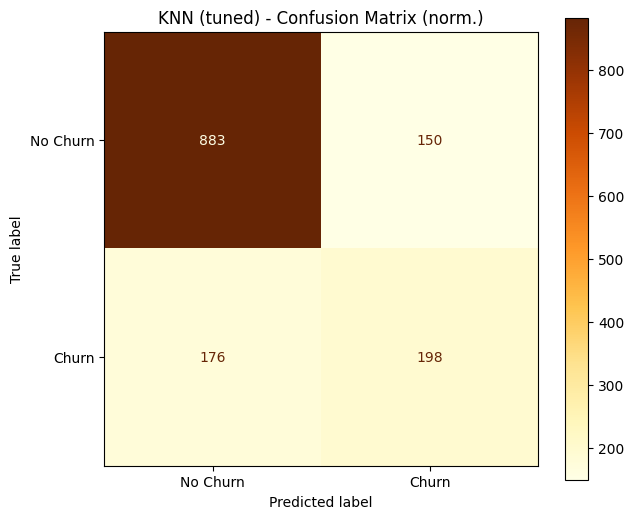

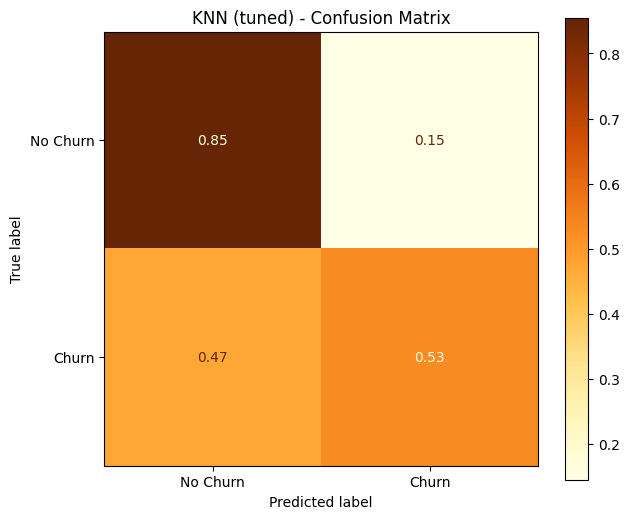

Accuracy Score Test: 0.7683013503909026
Accuracy Score Train: 0.7991111111111111 (as comparison)


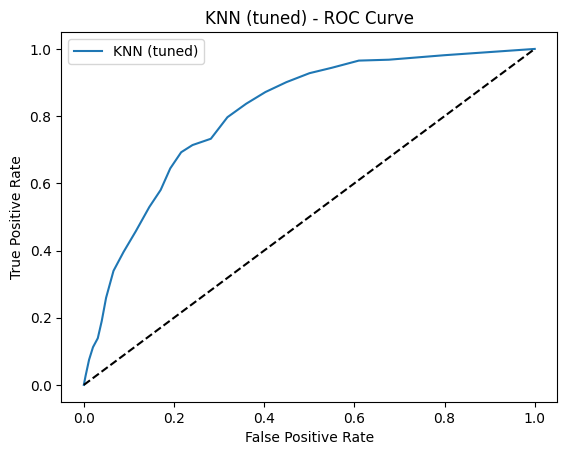

AUC Score (ROC): 0.8089840089868563



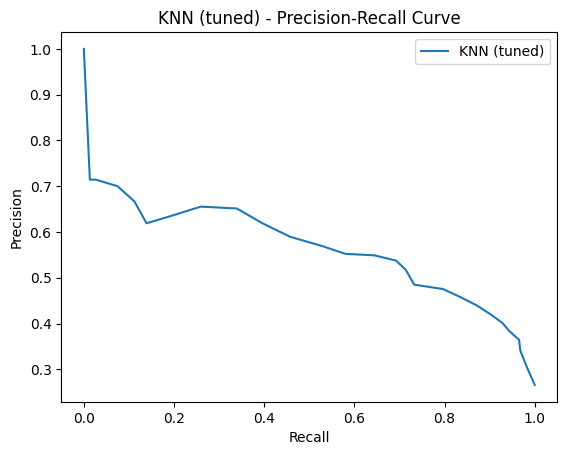

F1 Score: 0.5484764542936289 
AUC Score (PR): 0.5657971907678089



In [ ]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn_cv, y_pred_knn_tuned, 'KNN (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_knn_tuned_prob, 'KNN (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn_tuned, y_pred_knn_tuned_prob, 'KNN (tuned)')


Logistic wity Hyper

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for GridSearchCV
param_grid = {'penalty': ['l2'], 'C': np.arange(0.1, 5, 0.1)}

# Instantiate and train the logistic regression model with GridSearchCV
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the tuned model on the test set
y_pred_logreg_tuned = logreg_cv.predict(X_test)
y_pred_logreg_tuned_prob = logreg_cv.predict_proba(X_test)

print('Logistic Regression best parameters:', logreg_cv.best_params_, '\n')


Logistic Regression best parameters: {'C': 3.7, 'penalty': 'l2'} 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


245 fits failed out of a total of 490.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

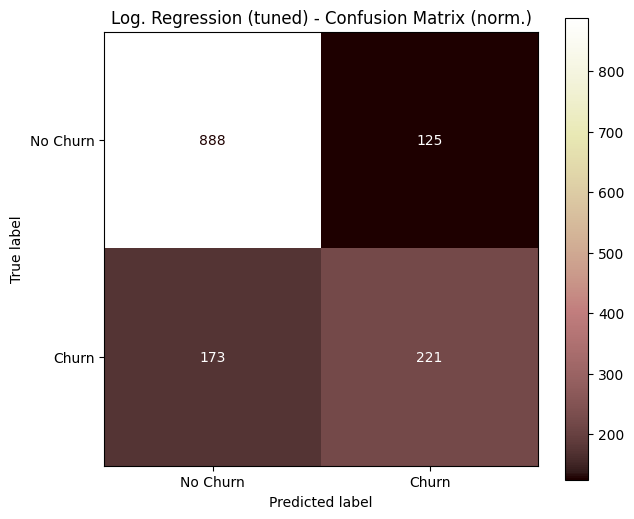

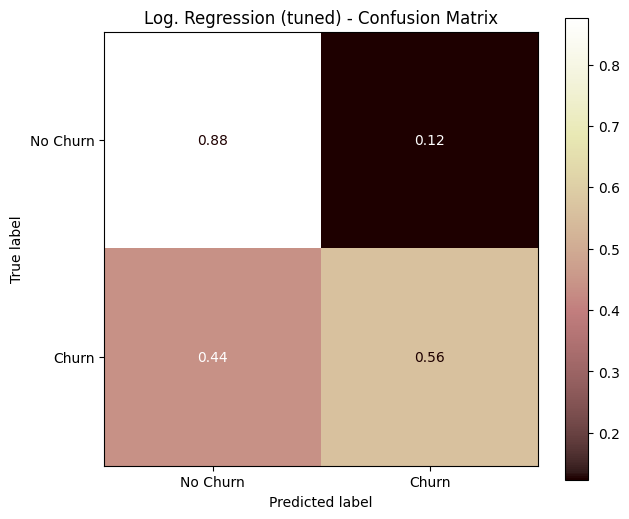

Accuracy Score Test: 0.7882018479033405
Accuracy Score Train: 0.8112 (as comparison)


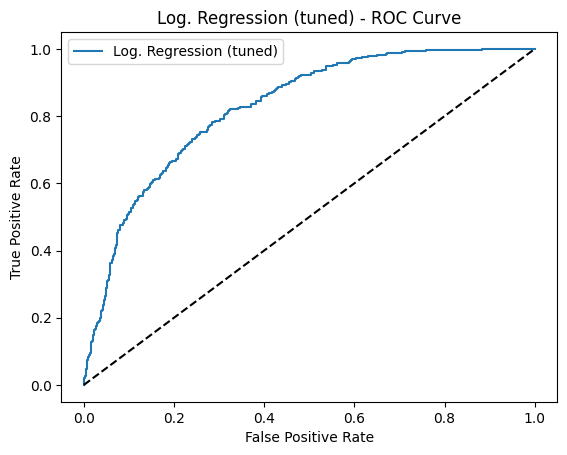

AUC Score (ROC): 0.825860263277895



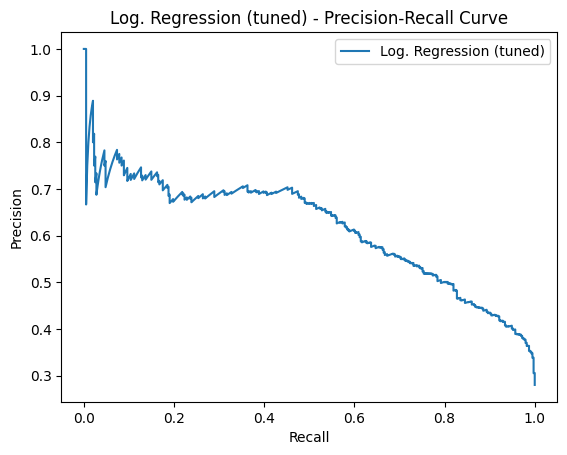

F1 Score: 0.5972972972972973 
AUC Score (PR): 0.6161780614432784



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearch
param_grid = {'C': np.arange(0.1, 5, 0.1), 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Perform GridSearchCV to find the best parameters and train the model
logreg_tuned_gs = GridSearchCV(logreg, param_grid, cv=5)
logreg_tuned_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set
y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg_tuned_gs, y_pred_logreg_tuned, 'Log. Regression (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg_tuned, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')


Random Forest with Hyperparameter

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for RandomizedSearch and instantiate and train the model.
param_grid_rf = {
    'n_estimators': np.arange(10, 2000, 10),
    'max_features': ['sqrt'],  # Explicitly set max_features to 'sqrt'
    'max_depth': np.arange(10, 200, 10),
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)


Random Forest - Best Parameters:  {'n_estimators': 1610, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}


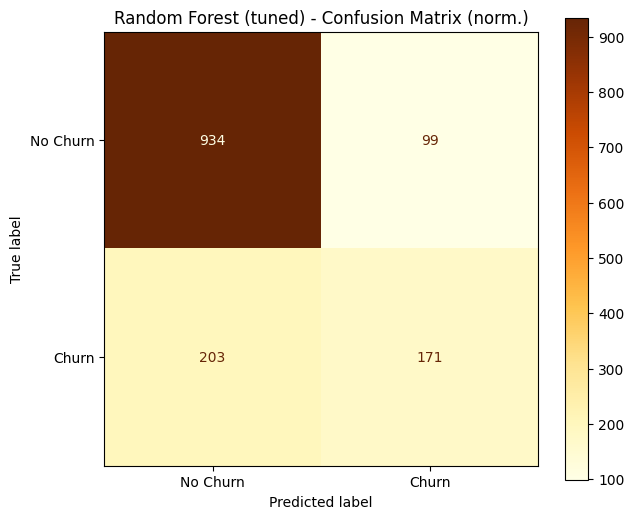

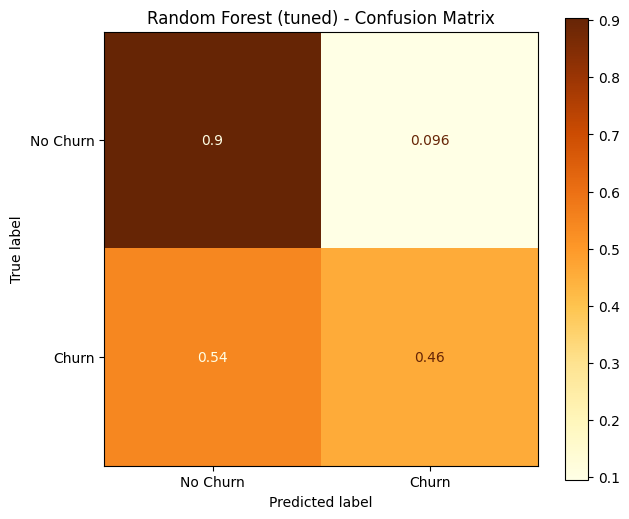

Accuracy Score Test: 0.7853589196872779
Accuracy Score Train: 0.9975111111111111 (as comparison)


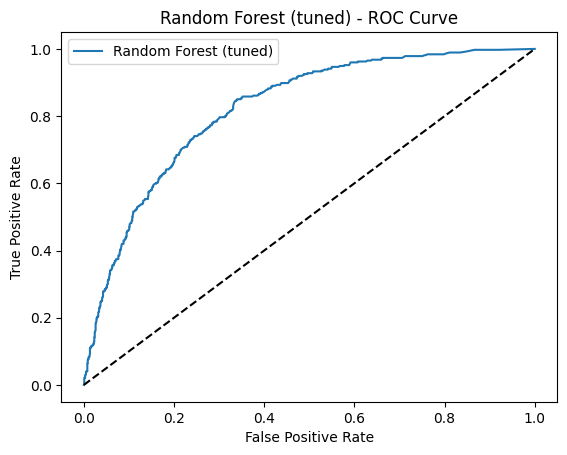

AUC Score (ROC): 0.8214134109157172



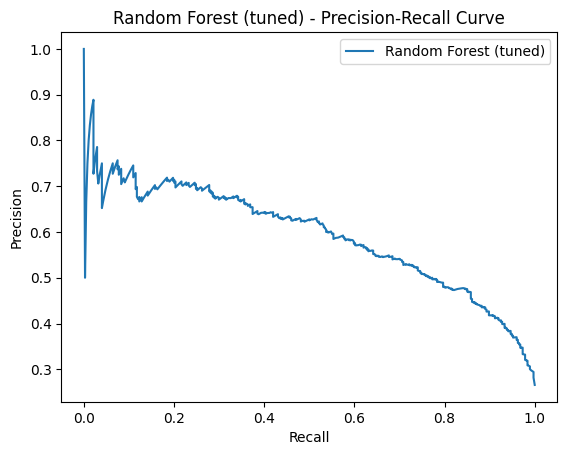

F1 Score: 0.531055900621118 
AUC Score (PR): 0.5920742013833641



In [ ]:
# Plot model evaluations - Confusion Matrix
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf_random_grid, y_pred_rf_tuned, 'Random Forest (tuned)')

# Plot model evaluations - ROC Curve and AUC Score
roc_curve_auc_score(X_test, y_test, y_pred_rf_tuned_prob, 'Random Forest (tuned)')

# Plot model evaluations - Precision-Recall Curve and Scores
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf_tuned, y_pred_rf_tuned_prob, 'Random Forest (tuned)')


SVM with Hyper

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearch and instantiate and train the model.
param_grid_svm = {'C': np.arange(0.1, 3, 0.1)}
support_vector_m = SVC(kernel='linear', probability=True)
support_vector_m_tuned = GridSearchCV(support_vector_m, param_grid_svm, cv=5)
support_vector_m_tuned.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm_tuned = support_vector_m_tuned.predict(X_test)
y_pred_svm_tuned_prob = support_vector_m_tuned.predict_proba(X_test)

print('SVM best C value:', support_vector_m_tuned.best_params_)


In [ ]:
# Plot model evaluations - Confusion Matrix
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m_tuned, y_pred_svm_tuned, 'SVM (tuned)')

# Plot model evaluations - ROC Curve and AUC Score
roc_curve_auc_score(X_test, y_test, y_pred_svm_tuned_prob, 'SVM (tuned)')

# Plot model evaluations - Precision-Recall Curve and Scores
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm_tuned, y_pred_svm_tuned_prob, 'SVM (tuned)')


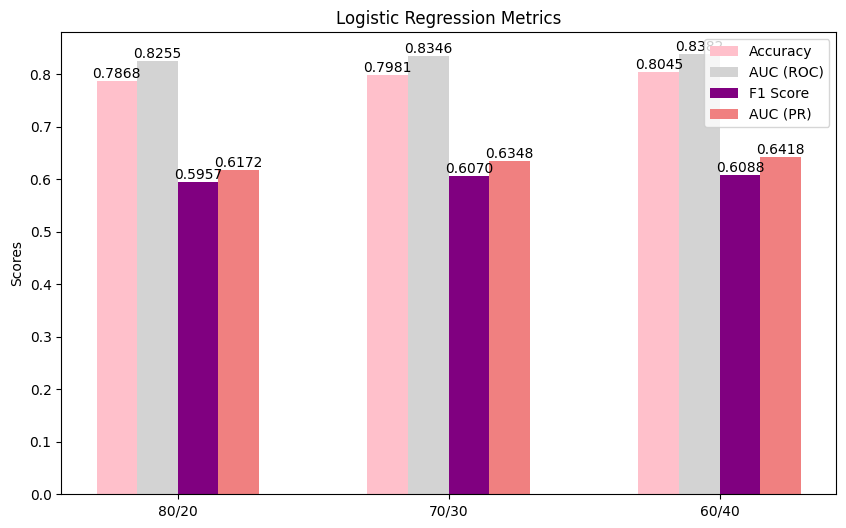

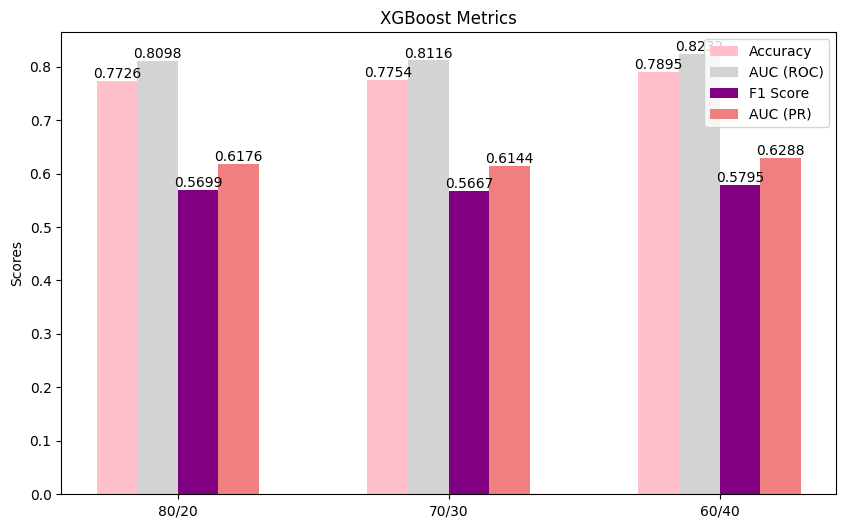

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Logistic Regression
logistic_metrics = {
    'Proportion': ['80/20', '70/30', '60/40'],
    'Accuracy': [0.7868, 0.7981, 0.8045],
    'AUC (ROC)': [0.8255, 0.8346, 0.8382],
    'F1 Score': [0.5957, 0.6070, 0.6088],
    'AUC (PR)': [0.6172, 0.6348, 0.6418]
}

# Metrics for XGBoost
xgboost_metrics = {
    'Proportion': ['80/20', '70/30', '60/40'],
    'Accuracy': [0.7726, 0.7754, 0.7895],
    'AUC (ROC)': [0.8098, 0.8116, 0.8232],
    'F1 Score': [0.5699, 0.5667, 0.5795],
    'AUC (PR)': [0.6176, 0.6144, 0.6288]
}

# Function to create bar charts with reduced bar width and different colors
def plot_metrics(metrics, title):
    proportions = metrics['Proportion']
    accuracy = metrics['Accuracy']
    auc_roc = metrics['AUC (ROC)']
    f1_score = metrics['F1 Score']
    auc_pr = metrics['AUC (PR)']

    x = np.arange(len(proportions))
    width = 0.15  # Reduced bar width

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='pink')
    rects2 = ax.bar(x - 0.5*width, auc_roc, width, label='AUC (ROC)', color='lightgrey')
    rects3 = ax.bar(x + 0.5*width, f1_score, width, label='F1 Score', color='purple')
    rects4 = ax.bar(x + 1.5*width, auc_pr, width, label='AUC (PR)', color='lightcoral')

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(proportions)
    ax.legend()

    # Display numbers on top of the bars
    for rect, label in zip(rects1 + rects2 + rects3 + rects4, accuracy + auc_roc + f1_score + auc_pr):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, f'{label:.4f}', ha='center', va='bottom')

    plt.show()

# Plot for Logistic Regression
plot_metrics(logistic_metrics, 'Logistic Regression Metrics')

# Plot for XGBoost
plot_metrics(xgboost_metrics, 'XGBoost Metrics')


## Conclusion
The evaluation of these models revealed that the tuned XGBoost model demonstrated superior performance across most metrics, showcasing higher accuracy, AUC scores (ROC and PR), and F1 score compared to both default XGBoost and other models. This suggests that the tuned XGBoost model is well-equipped to identify potential churners with greater accuracy and precision. Its robustness in differentiating between churn and non-churn cases, as evidenced by the high AUC scores, highlights its reliability in real-world applications.

It's important to note that while the XGBoost (Tuned) model displayed the best overall performance, selecting the optimal model should also consider factors such as interpretability, computational complexity, and business requirements. This model evaluation process provides valuable insights for telecommunications companies aiming to enhance customer retention strategies through predictive modeling. By leveraging advanced techniques like XGBoost and hyperparameter tuning, these companies can make informed decisions and proactively address churn, ultimately leading to improved customer satisfaction and business growth.
